In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

#Setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [11]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [16]:
aDF=pd.read_csv('application_data.csv')
aDF.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [17]:
pDF = pd.read_csv("previous_application.csv")
pDF.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [18]:
print("Database dimension - applicationDF     :",aDF.shape)
print("Database dimension - previousDF        :",pDF.shape)

print("Database size - applicationDF          :",aDF.size)
print("Database size - previousDF             :",pDF.size)

Database dimension - applicationDF     : (307511, 122)
Database dimension - previousDF        : (1670214, 37)
Database size - applicationDF          : 37516342
Database size - previousDF             : 61797918


In [19]:
aDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [20]:
pDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [21]:
aDF.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [22]:
pDF.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

DATA CLEANUP


In [24]:
round(aDF.isnull().sum() / aDF.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [25]:
aDF.duplicated().sum()

0

In [26]:
null_aDF = pd.DataFrame((aDF.isnull().sum())*100/aDF.shape[0]).reset_index()
null_aDF.columns = ['Column Name', 'Null Values Percentage']
nullcol_40_application = null_aDF[null_aDF["Null Values Percentage"]>=40]
print(nullcol_40_application)

                     Column Name  Null Values Percentage
21                   OWN_CAR_AGE               65.990810
41                  EXT_SOURCE_1               56.381073
44                APARTMENTS_AVG               50.749729
45              BASEMENTAREA_AVG               58.515956
46   YEARS_BEGINEXPLUATATION_AVG               48.781019
47               YEARS_BUILD_AVG               66.497784
48                COMMONAREA_AVG               69.872297
49                 ELEVATORS_AVG               53.295980
50                 ENTRANCES_AVG               50.348768
51                 FLOORSMAX_AVG               49.760822
52                 FLOORSMIN_AVG               67.848630
53                  LANDAREA_AVG               59.376738
54          LIVINGAPARTMENTS_AVG               68.354953
55                LIVINGAREA_AVG               50.193326
56       NONLIVINGAPARTMENTS_AVG               69.432963
57             NONLIVINGAREA_AVG               55.179164
58               APARTMENTS_MOD

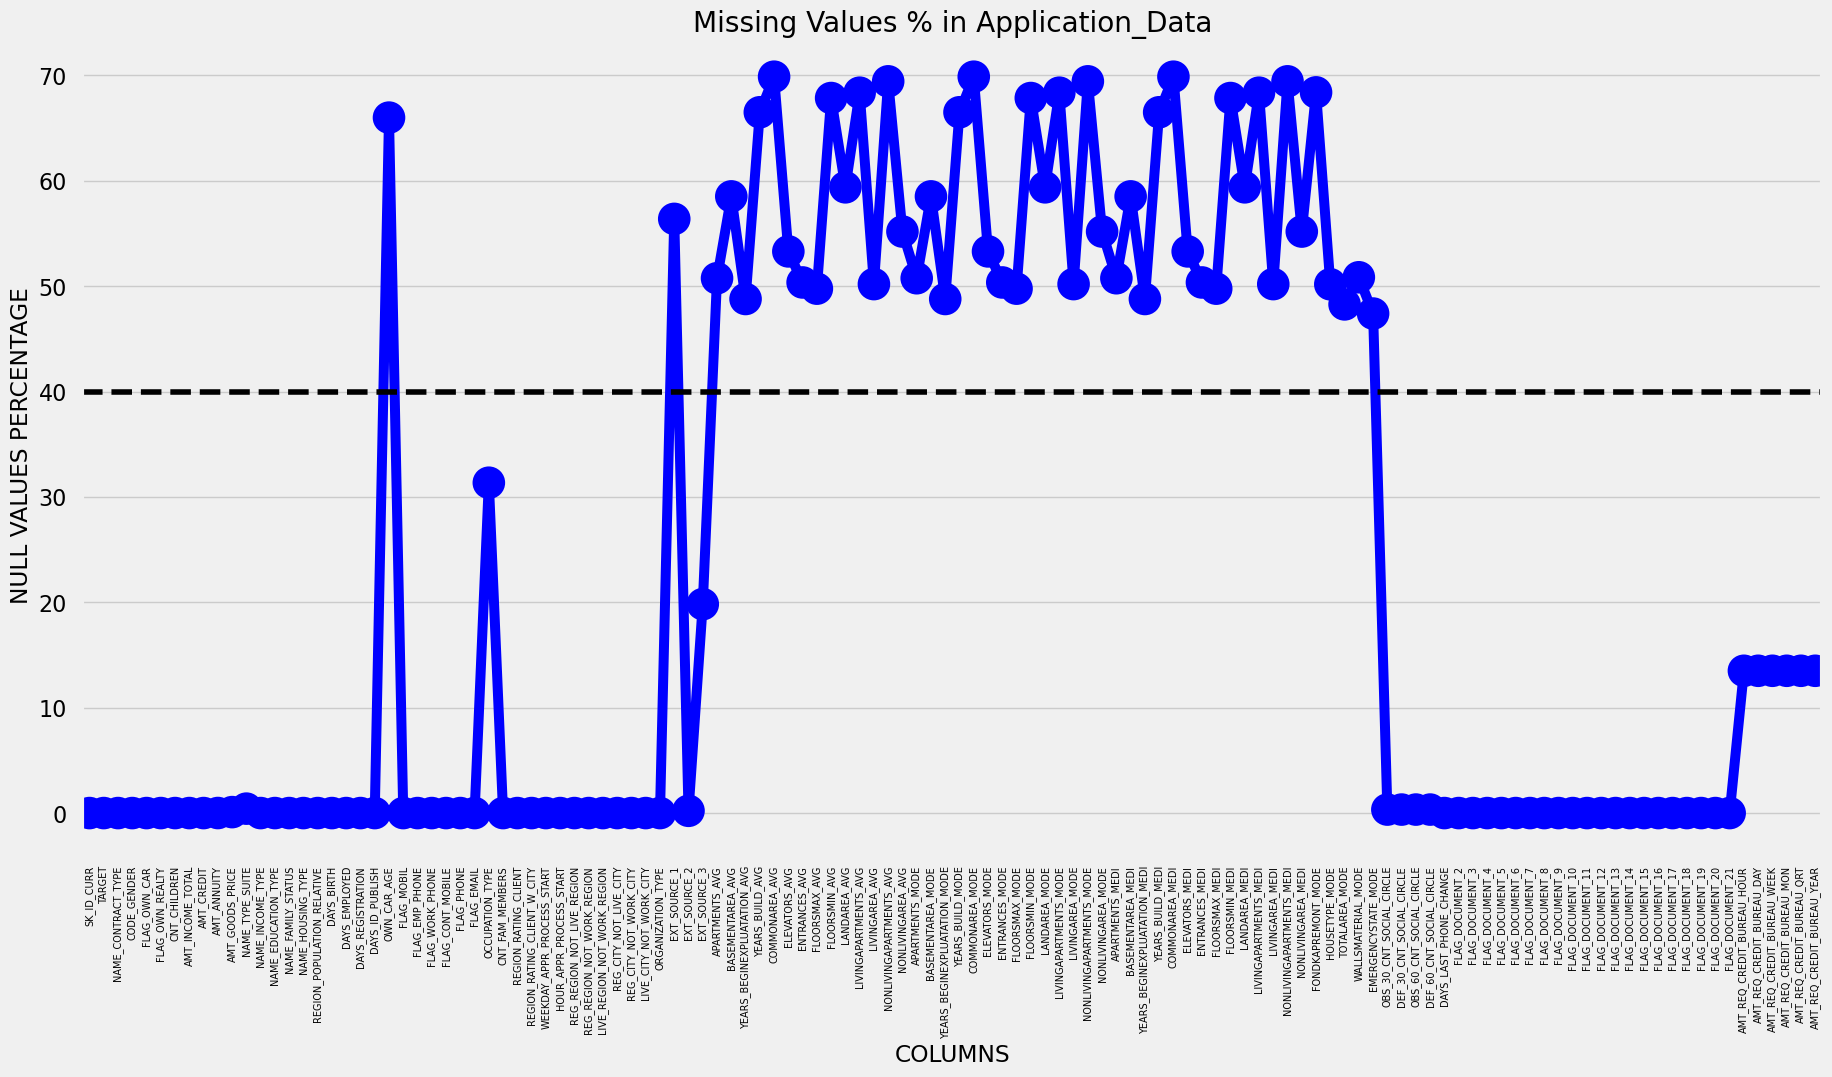

In [34]:
fig = plt.figure(figsize=(20,10))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_aDF, color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='black')
plt.title("Missing Values % in Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [35]:
# Number of columns that have more than or euqal to 40% null values
print("\nNumber of Columns with more than or equal to 40% null values in aDF: ", len(nullcol_40_application))


Number of Columns with more than or equal to 40% null values in aDF:  49


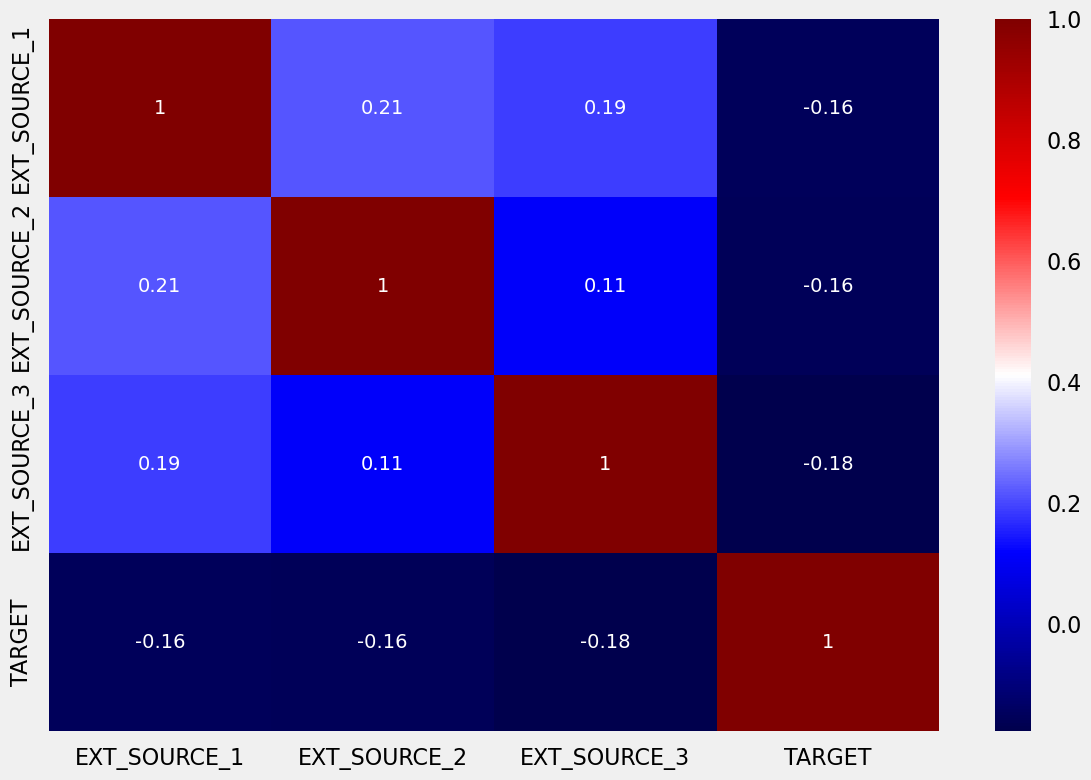

In [36]:
Source = aDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
           xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="seismic")

In [37]:
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3']

In [38]:
len(Unwanted_application)

51

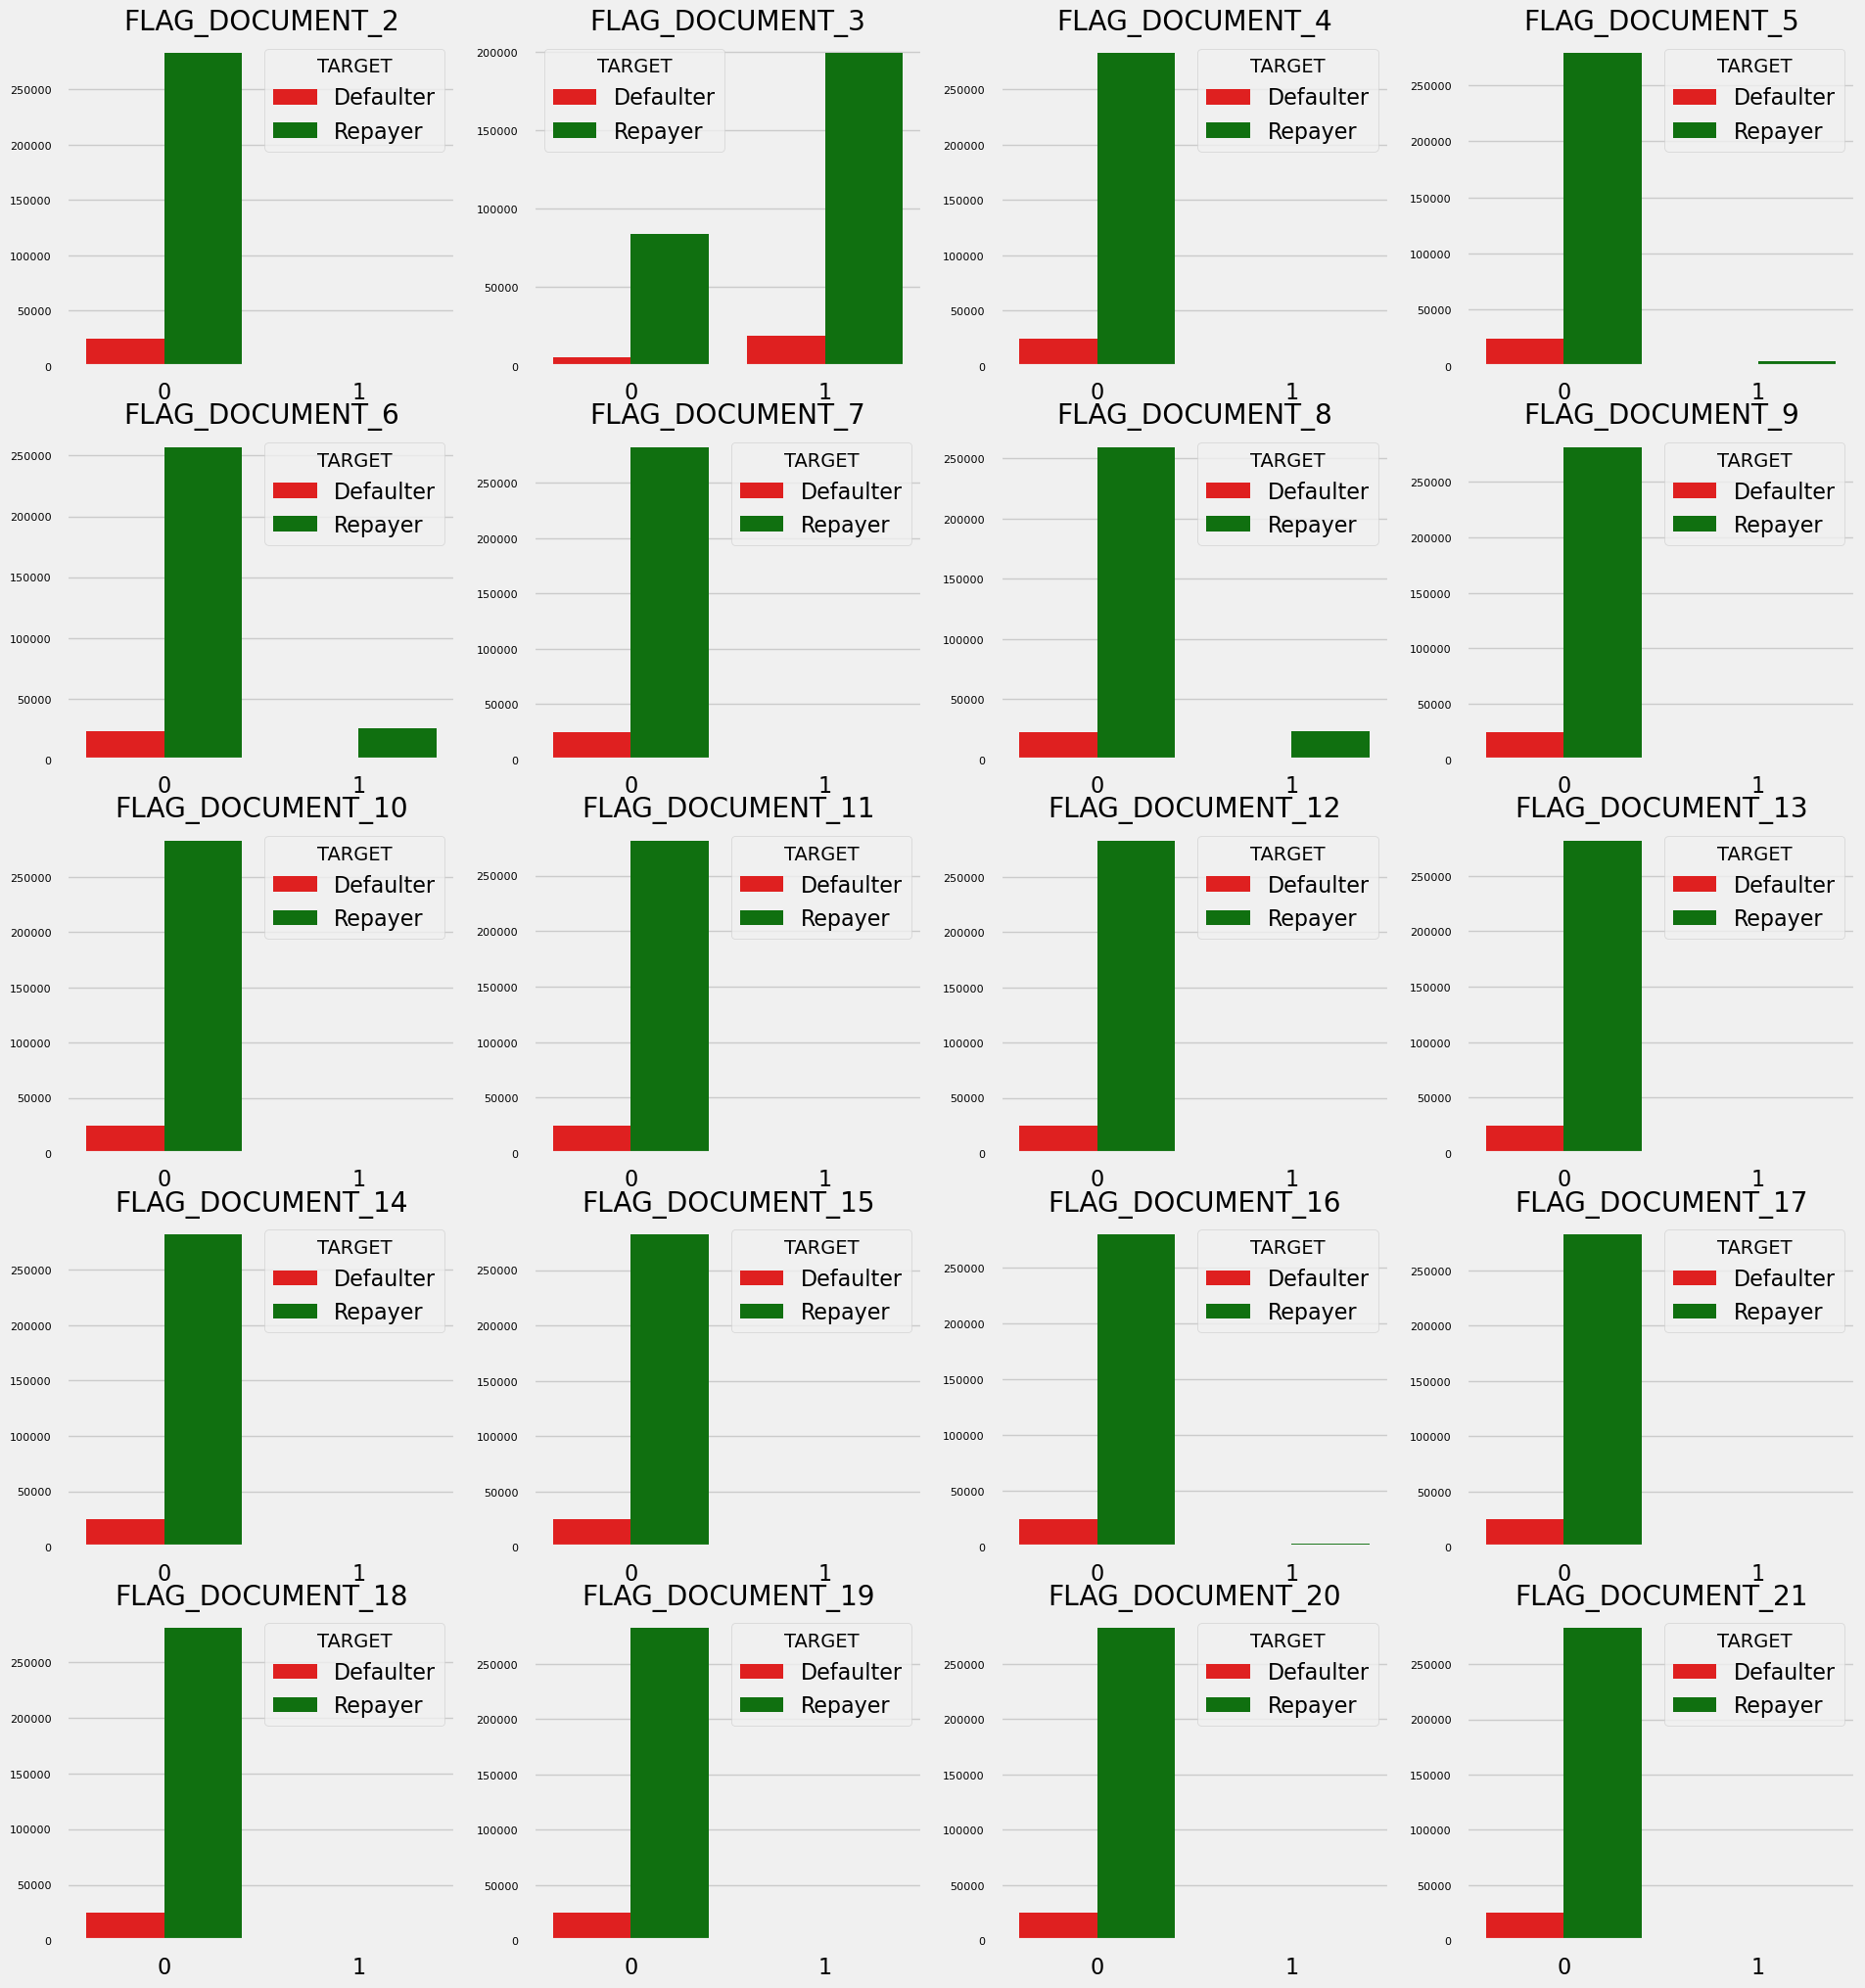

In [41]:
# Checking correlation of Flag Document columns vs TARGET column to see if the flag document has any relation 
# with repayment status.

col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = aDF[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [42]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

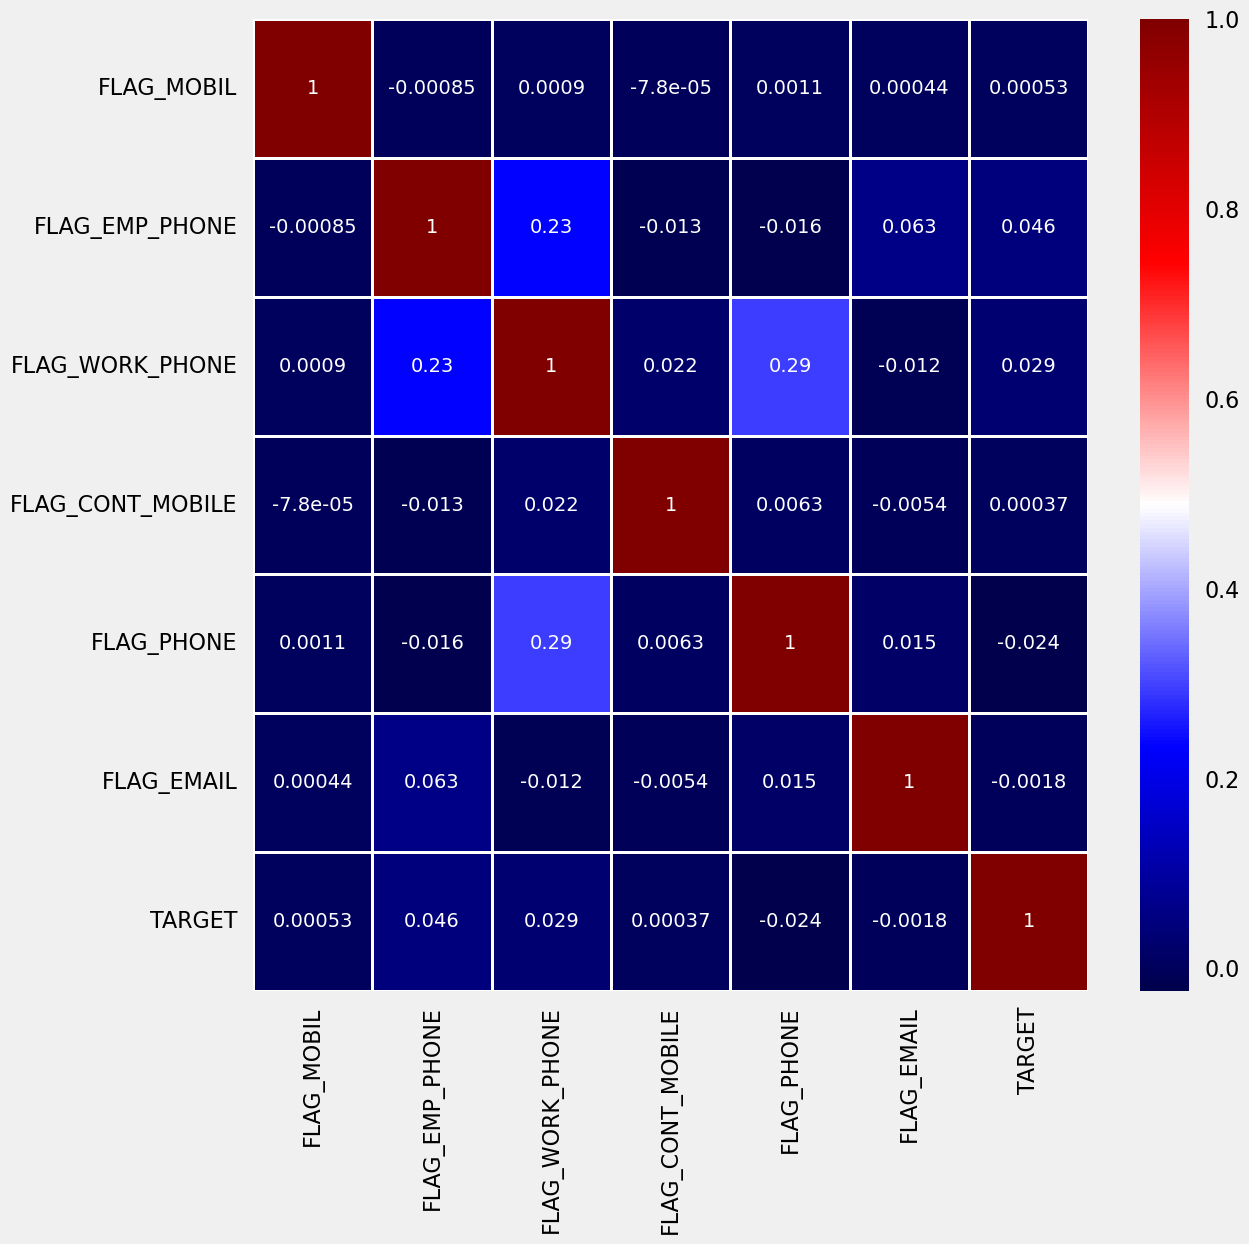

In [45]:
# checking correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = aDF[contact_col].corr()
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="seismic",
            linewidth=1)

In [46]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

In [47]:
# Dropping the unnecessary columns from aDF
aDF.drop(labels=Unwanted_application,axis=1,inplace=True)

In [48]:
aDF.shape

(307511, 46)

In [49]:
# Describing dataset and observing changes
aDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Analysizing pDF & Cleanup

In [50]:
# Percentage of null values in each column of Previous_Application
round(pDF.isnull().sum() / pDF.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [51]:
pDF.duplicated().sum()

0

In [65]:
null_pDF = pd.DataFrame((pDF.isnull().sum())*100/pDF.shape[0]).reset_index()
null_pDF.columns = ['Column Name', 'Null Values Percentage']
nullcol_40_previous = null_pDF[null_pDF["Null Values Percentage"]>=40]
print(nullcol_40_previous)

                  Column Name  Null Values Percentage
6            AMT_DOWN_PAYMENT               53.636480
12          RATE_DOWN_PAYMENT               53.636480
13      RATE_INTEREST_PRIMARY               99.643698
14   RATE_INTEREST_PRIVILEGED               99.643698
20            NAME_TYPE_SUITE               49.119754
31         DAYS_FIRST_DRAWING               40.298129
32             DAYS_FIRST_DUE               40.298129
33  DAYS_LAST_DUE_1ST_VERSION               40.298129
34              DAYS_LAST_DUE               40.298129
35           DAYS_TERMINATION               40.298129
36  NFLAG_INSURED_ON_APPROVAL               40.298129


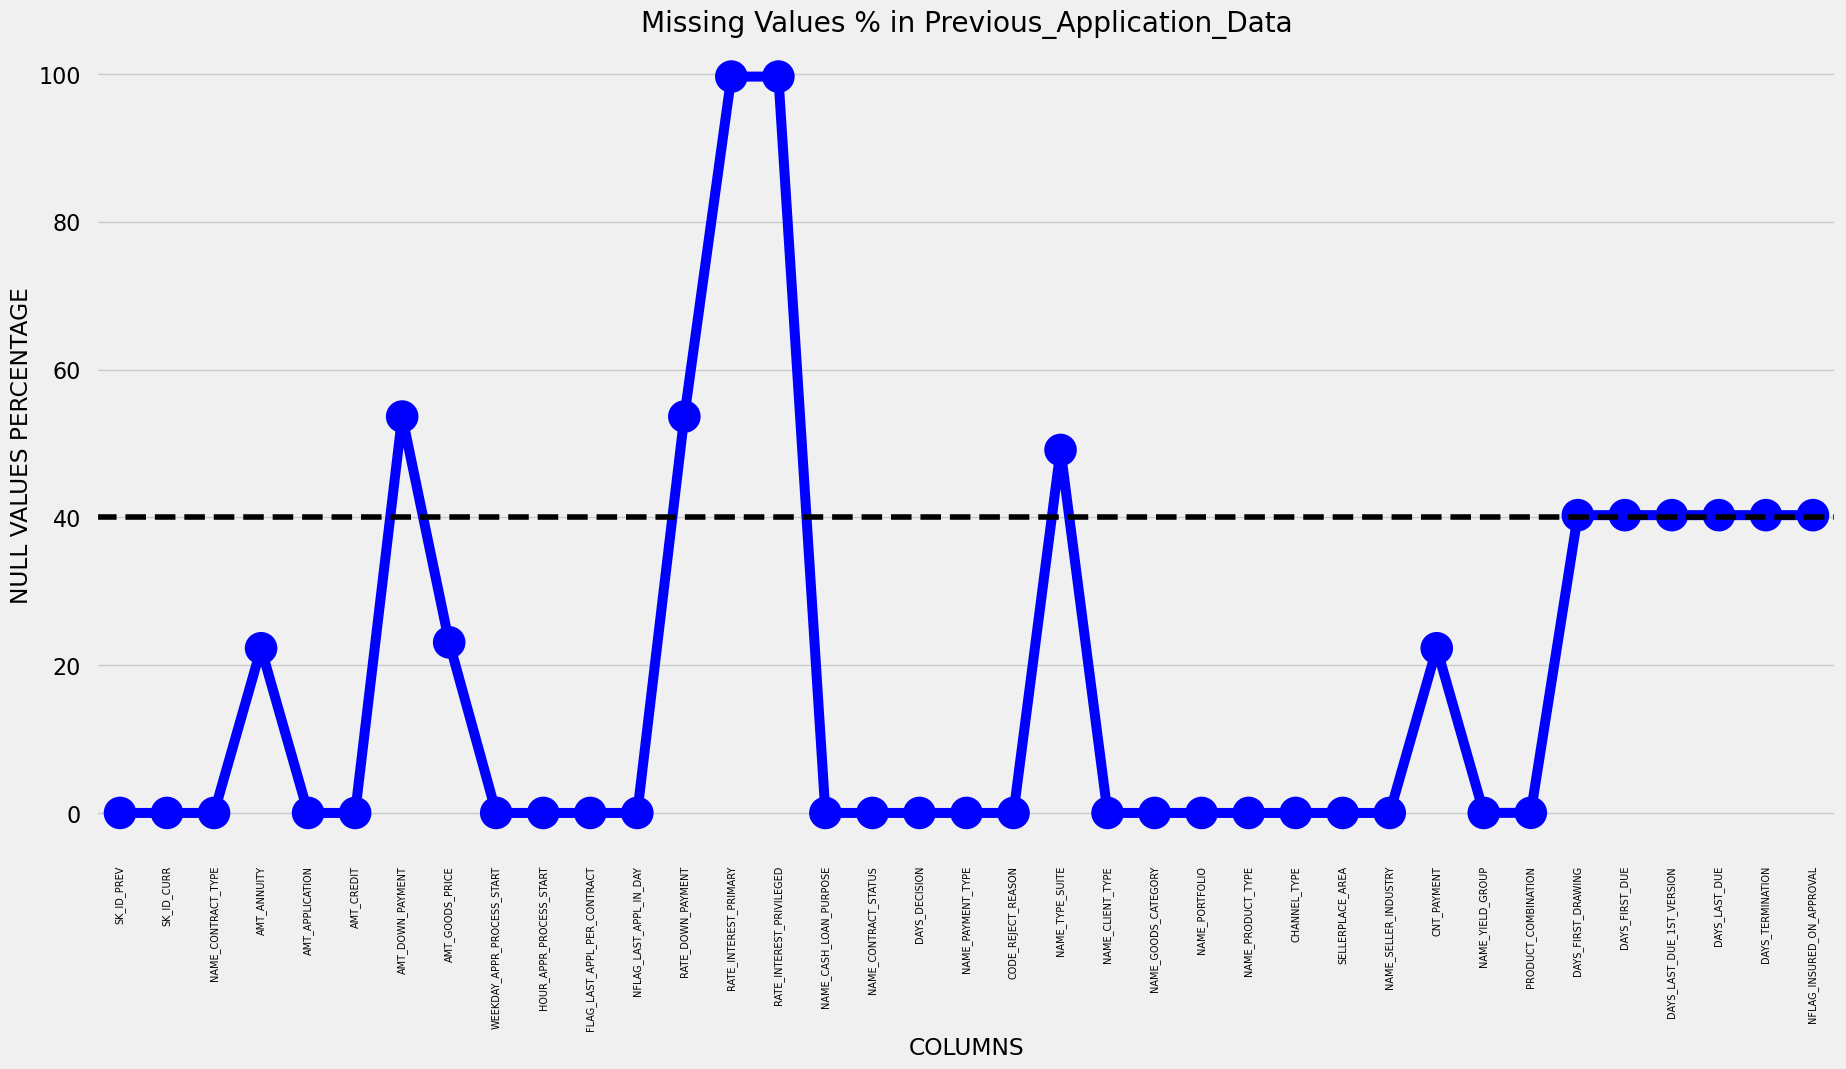

In [53]:
fig = plt.figure(figsize=(20,10))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_pDF, color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='black')
plt.title("Missing Values % in Previous_Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [66]:
#Checking the columns which have more than 40% missing values
nullcol_40_previous = null_pDF[null_pDF["Null Values Percentage"]>=40]
nullcol_40_previous

Column Name  Null Values Percentage
6            AMT_DOWN_PAYMENT               53.636480
12          RATE_DOWN_PAYMENT               53.636480
13      RATE_INTEREST_PRIMARY               99.643698
14   RATE_INTEREST_PRIVILEGED               99.643698
20            NAME_TYPE_SUITE               49.119754
31         DAYS_FIRST_DRAWING               40.298129
32             DAYS_FIRST_DUE               40.298129
33  DAYS_LAST_DUE_1ST_VERSION               40.298129
34              DAYS_LAST_DUE               40.298129
35           DAYS_TERMINATION               40.298129
36  NFLAG_INSURED_ON_APPROVAL               40.298129

In [67]:
# Number of columns that have more than or euqal to 40% null values
print("\nNumber of Columns with more than or equal to 40% null values in pDF: ", len(nullcol_40_previous))


Number of Columns with more than or equal to 40% null values in pDF:  11


In [58]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [68]:
# Getting the 11 columns which has more than 40% unknown
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [69]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [70]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

15

In [71]:
pDF.drop(labels=Unwanted_previous,axis=1,inplace=True)
# Inspecting the dataframe after removal of unnecessary columns
pDF.shape

(1670214, 22)

In [72]:
# Inspection after removal of unnecessary columns
pDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [74]:
# Converting Negative days to positive days 

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    aDF[col] = abs(aDF[col])

In [77]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
aDF['AMT_CREDIT']=aDF['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

aDF['AMT_CREDIT_RANGE']=pd.cut(aDF['AMT_CREDIT'],bins=bins,labels=slots)

In [78]:
aDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

##### >16% loan applicants have taken loan above 1M


In [80]:
# Creating bins for Age
aDF['AGE'] = aDF['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']
aDF['AGE_GROUP']=pd.cut(aDF['AGE'],bins=bins,labels=slots, include_lowest=True)

In [81]:
aDF['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

###### 31% loan applicants are 50+ years. > 55% of loan applicants are 40+ years

In [83]:
# Creating bins for Employement Time
aDF['YEARS_EMPLOYED'] = aDF['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

aDF['EMPLOYMENT_YEAR']=pd.cut(aDF['YEARS_EMPLOYED'],bins=bins,labels=slots, include_lowest=True)

aDF['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         60.498063
5-10        22.203405
10-20       12.952482
20-30        3.335092
30-40        0.941552
40-50        0.069407
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

##### > 55% of the loan applicants have work exp of 0-5 years and almost 80% of them have <10 years of work exp

In [85]:
# inspecting the column types if they are in correct data type using the above result.
aDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [86]:
#Checking the number of unique values each column possess to identify categorical columns
aDF.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [89]:
#Conversion of Object and Numerical columns to Categorical Columns
numerical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in numerical_columns:
    aDF[col] =pd.Categorical(aDF[col])
    
# Checking if conversion is reflected
aDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [87]:
#Converting negative days to positive days 
pDF['DAYS_DECISION'] = abs(pDF['DAYS_DECISION'])

In [90]:
#age group calculation e.g. 388 will be grouped as 300-400
pDF['DAYS_DECISION_GROUP'] = (pDF['DAYS_DECISION']-(pDF['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((pDF['DAYS_DECISION'] - (pDF['DAYS_DECISION'] % 400)) + (pDF['DAYS_DECISION'] % 400) +(400 - (pDF['DAYS_DECISION'] % 400))).astype(str)

In [91]:
pDF['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

##### 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision.

In [92]:
# inspecting the column types if they are in correct data type.
pDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [93]:
#Checking the number of unique values each column in pDF possess to identify categorical columns
pDF.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_STATUS            4
NAME_YIELD_GROUP                5
NAME_PORTFOLIO                  5
DAYS_DECISION_GROUP             8
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [96]:
#Converting Categorical columns from Object to categorical 
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    pDF[col] =pd.Categorical(pDF[col])

# inspecting the column types after conversion if reflected
pDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

*1. Imputing Null Values in aDF*

In [100]:
# checking the null value % of each column in applicationDF dataframe
Impute_Col=round(aDF.isnull().sum() / aDF.shape[0] * 100.00,2)
Impute_Col

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [101]:
#collect all the columns with impute/improper data
impute_cols_list = Impute_Col[Impute_Col>0].index.tolist()
print('List of Columns where we need to impute missing values appropriately:\n\n',impute_cols_list)

List of Columns where we need to impute missing values appropriately:

 ['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'EMPLOYMENT_YEAR']


In [102]:
#observing all the rows with null values
null_data = aDF[aDF.isnull().any(axis=1)]
null_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3           100006       0         Cash loans           F            N   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
11          100015       0         Cash loans           F            N   
14          100018       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307501      456245       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3                    Y             0          1.350000    3.126825   
8                    Y             0          1.125000   10.196100   
9                    Y             0          1.350000    4.050000   
11                   Y             0          0.384192    1.483650   
14                   Y             0          1.890000    7.736805   
...                ...           ...               ...         ...   
307501               Y             3          0.810000    2.695500   
307504               Y             0          1.530000    3.319200   
307505               Y             0          1.125000    2.250000   
307506               N             0          1.575000    2.547000   
307507               Y             0          0.720000    2.695500   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
3           29686.5         297000.0   Unaccompanied               Working   
8           33826.5         913500.0        Children             Pensioner   
9           20250.0         405000.0   Unaccompanied               Working   
11          10678.5         135000.0        Children             Pensioner   
14          32778.0         679500.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307501      11871.0         225000.0   Unaccompanied  Commercial associate   
307504      16096.5         225000.0   Unaccompanied               Working   
307505      22050.0         225000.0   Unaccompanied             Pensioner   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
3       Secondary / secondary special        Civil marriage   
8       Secondary / secondary special               Married   
9       Secondary / secondary special  Single / not married   
11      Secondary / secondary special               Married   
14      Secondary / secondary special               Married   
...                               ...                   ...   
307501  Secondary / secondary special               Married   
307504  Secondary / secondary special             Separated   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
3       House / apartment                    0.008019       19005   
8       House / apartment                    0.018634       20099   
9       House / apartment                    0.019689       14469   
11      House / apartment                    0.015221       20417   
14      House / apartment                    0.010006       14583   
...                   ...                         ...         ...   
307501  House / apartment                    0.009175       12961   
307504  House / apartment       

In [104]:
# Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:

aDF['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [105]:
# Impute categorical variable 'OCCUPATION_TYPE' has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:

aDF['OCCUPATION_TYPE'] = aDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
aDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

# Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:

aDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [106]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    aDF[col].fillna(aDF[col].median(),inplace = True)

#### Null Value Imputation in pDF

In [118]:
# checking the null value % of each column in pDF dataframe
round(pDF.isnull().sum() / pDF.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

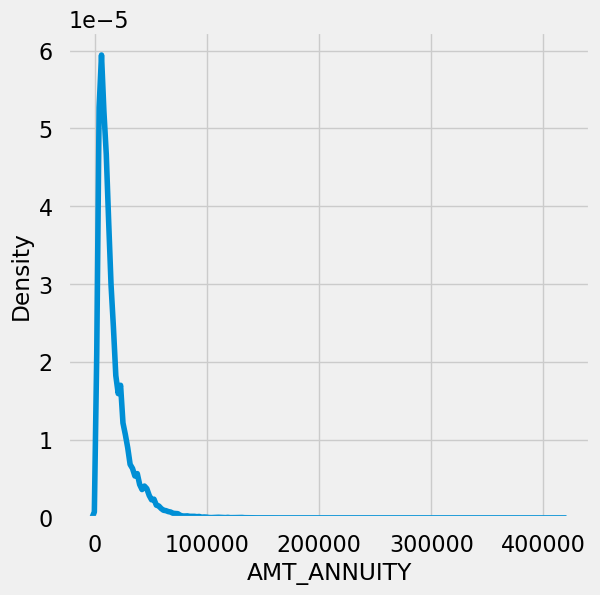

In [119]:
plt.figure(figsize=(6,6))
sns.kdeplot(pDF['AMT_ANNUITY'])
plt.show()

In [120]:
pDF['AMT_ANNUITY'].fillna(pDF['AMT_ANNUITY'].median(),inplace = True)

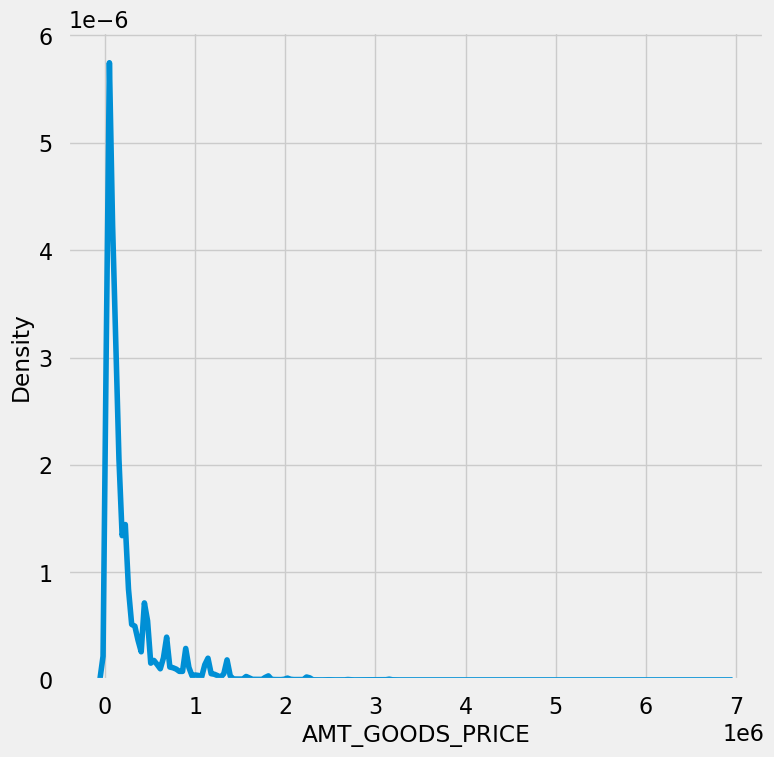

In [122]:
plt.figure(figsize=(8,8))
sns.kdeplot(pDF['AMT_GOODS_PRICE'][pd.notnull(pDF['AMT_GOODS_PRICE'])])
plt.show()

##### several peaks along the distribution. Impute using the mode, mean and median and see if the distribution is still about the same.

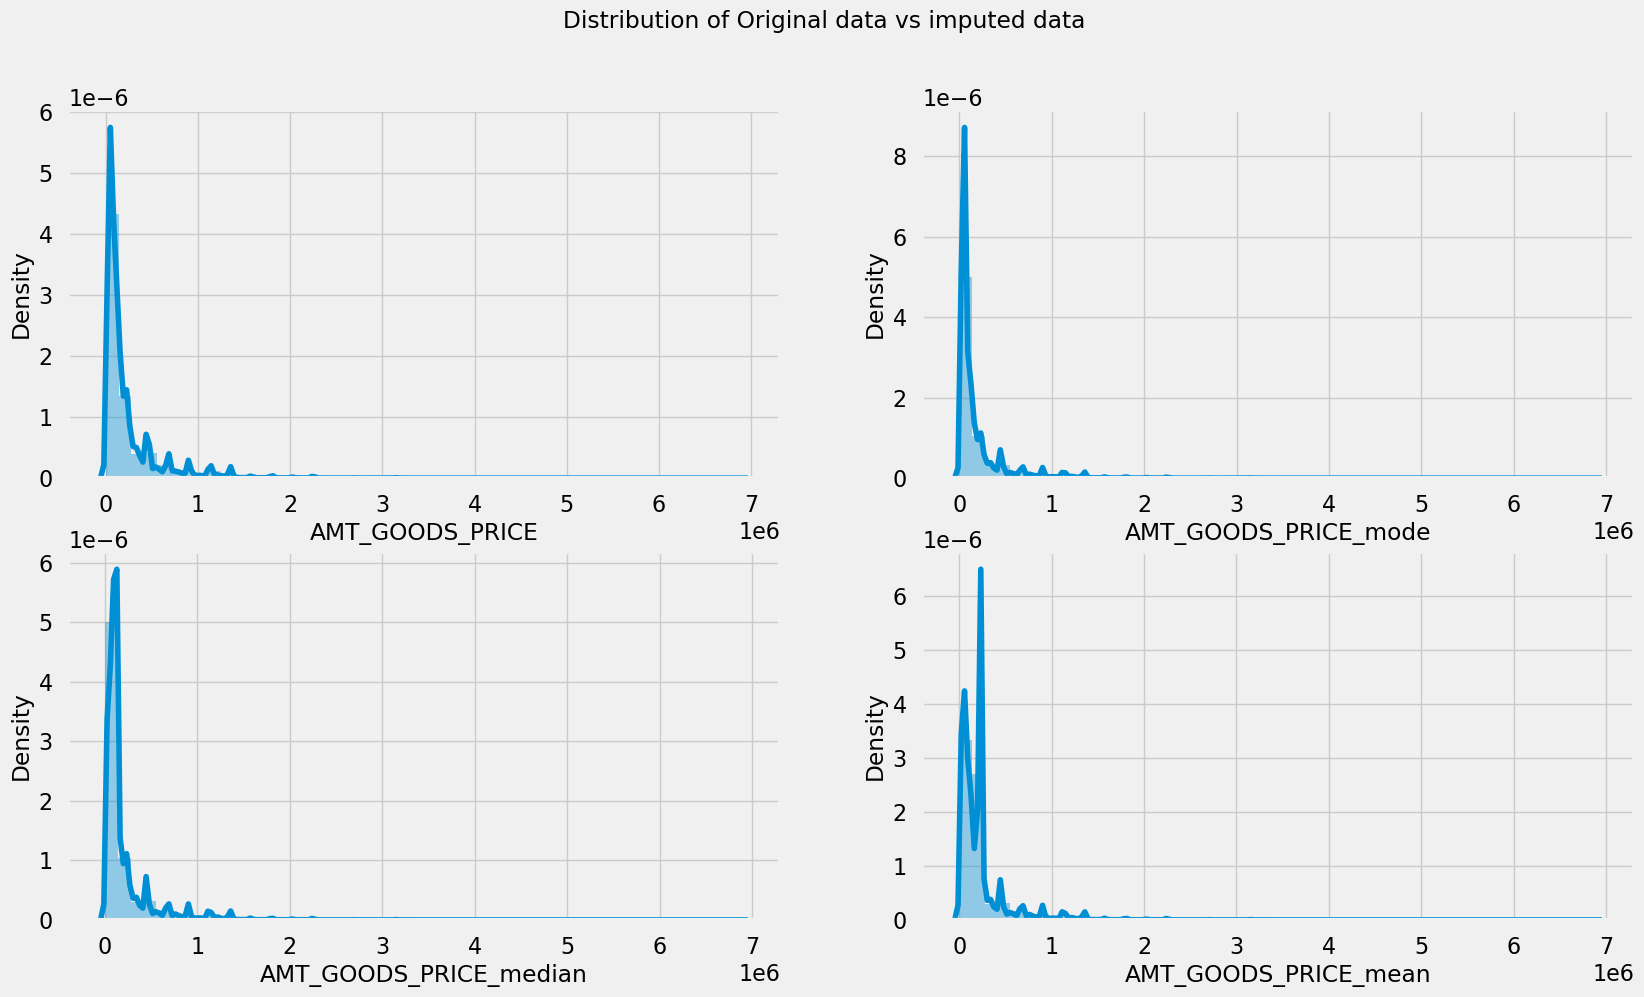

In [123]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = pDF['AMT_GOODS_PRICE'].fillna(pDF['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = pDF['AMT_GOODS_PRICE'].fillna(pDF['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = pDF['AMT_GOODS_PRICE'].fillna(pDF['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(pDF['AMT_GOODS_PRICE'][pd.notnull(pDF['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

##### The original distribution is closer with the distribution of data imputed with mode in this case

In [124]:
pDF['AMT_GOODS_PRICE'].fillna(pDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [125]:
pDF.loc[pDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [126]:
pDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [127]:
# checking the null value % of each column in previousDF dataframe
round(pDF.isnull().sum() / pDF.shape[0] * 100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

#### Still few null values in the PRODUCT_COMBINATION column.Ignoring as percentage very less.

#### Finding outlier information in aDF

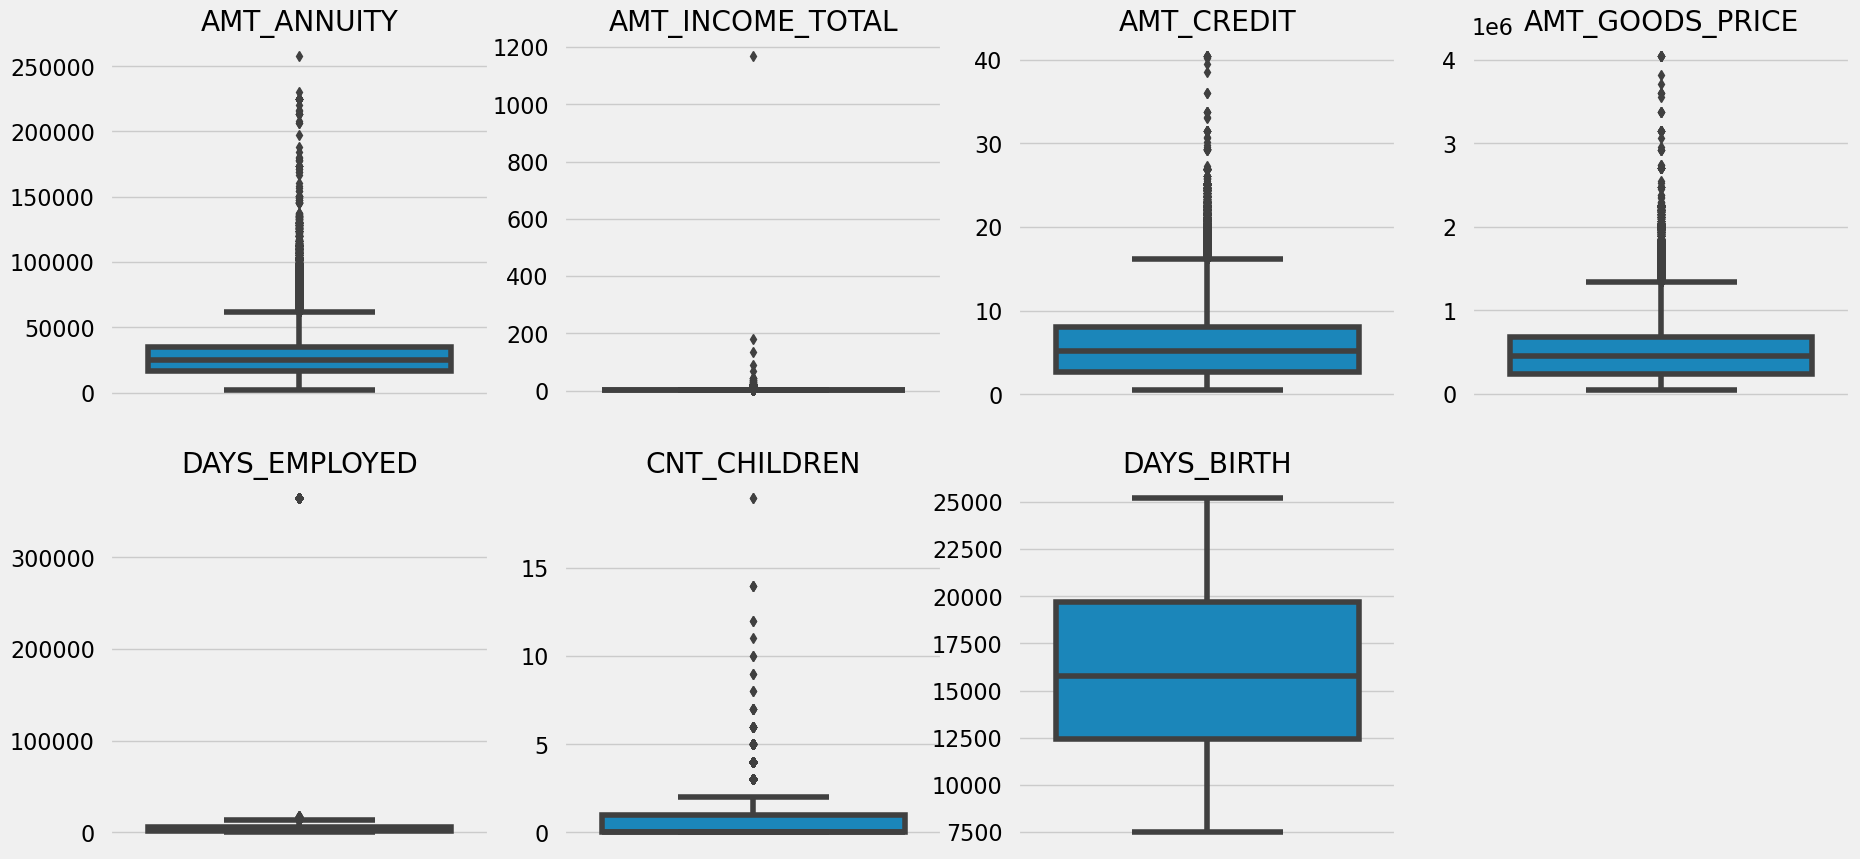

In [132]:
plt.figure(figsize=(20,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=aDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=aDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#### Observations

1. AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

2. AMT_INCOME_TOTAL has huge number of outliers indicating that few loan applicants have high income when compared to the others.

3. DAYS_BIRTH has no outliers meaning the available data is reliable.

4. DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible hence an incorrect entry.

In [133]:
aDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN',
               'DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE  \
count  307499.000000     307511.000000  307511.000000     3.072330e+05   
mean    27108.573909          1.687979       5.990260     5.383962e+05   
std     14493.737315          2.371231       4.024908     3.694465e+05   
min      1615.500000          0.256500       0.450000     4.050000e+04   
25%     16524.000000          1.125000       2.700000     2.385000e+05   
50%     24903.000000          1.471500       5.135310     4.500000e+05   
75%     34596.000000          2.025000       8.086500     6.795000e+05   
max    258025.500000       1170.000000      40.500000     4.050000e+06   

          DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED  
count  307511.000000  307511.000000  307511.000000  
mean    16036.995067       0.417052   67724.742149  
std      4363.988632       0.722121  139443.751806  
min      7489.000000       0.000000       0.000000  
25%     12413.000000       0.000000     933.000000  
50%     15750.000000       0.000000    2219.000000  
75%     19682.000000       1.000000    5707.000000  
max     25229.000000      19.000000  365243.000000

##### Finding outlier information in pDF

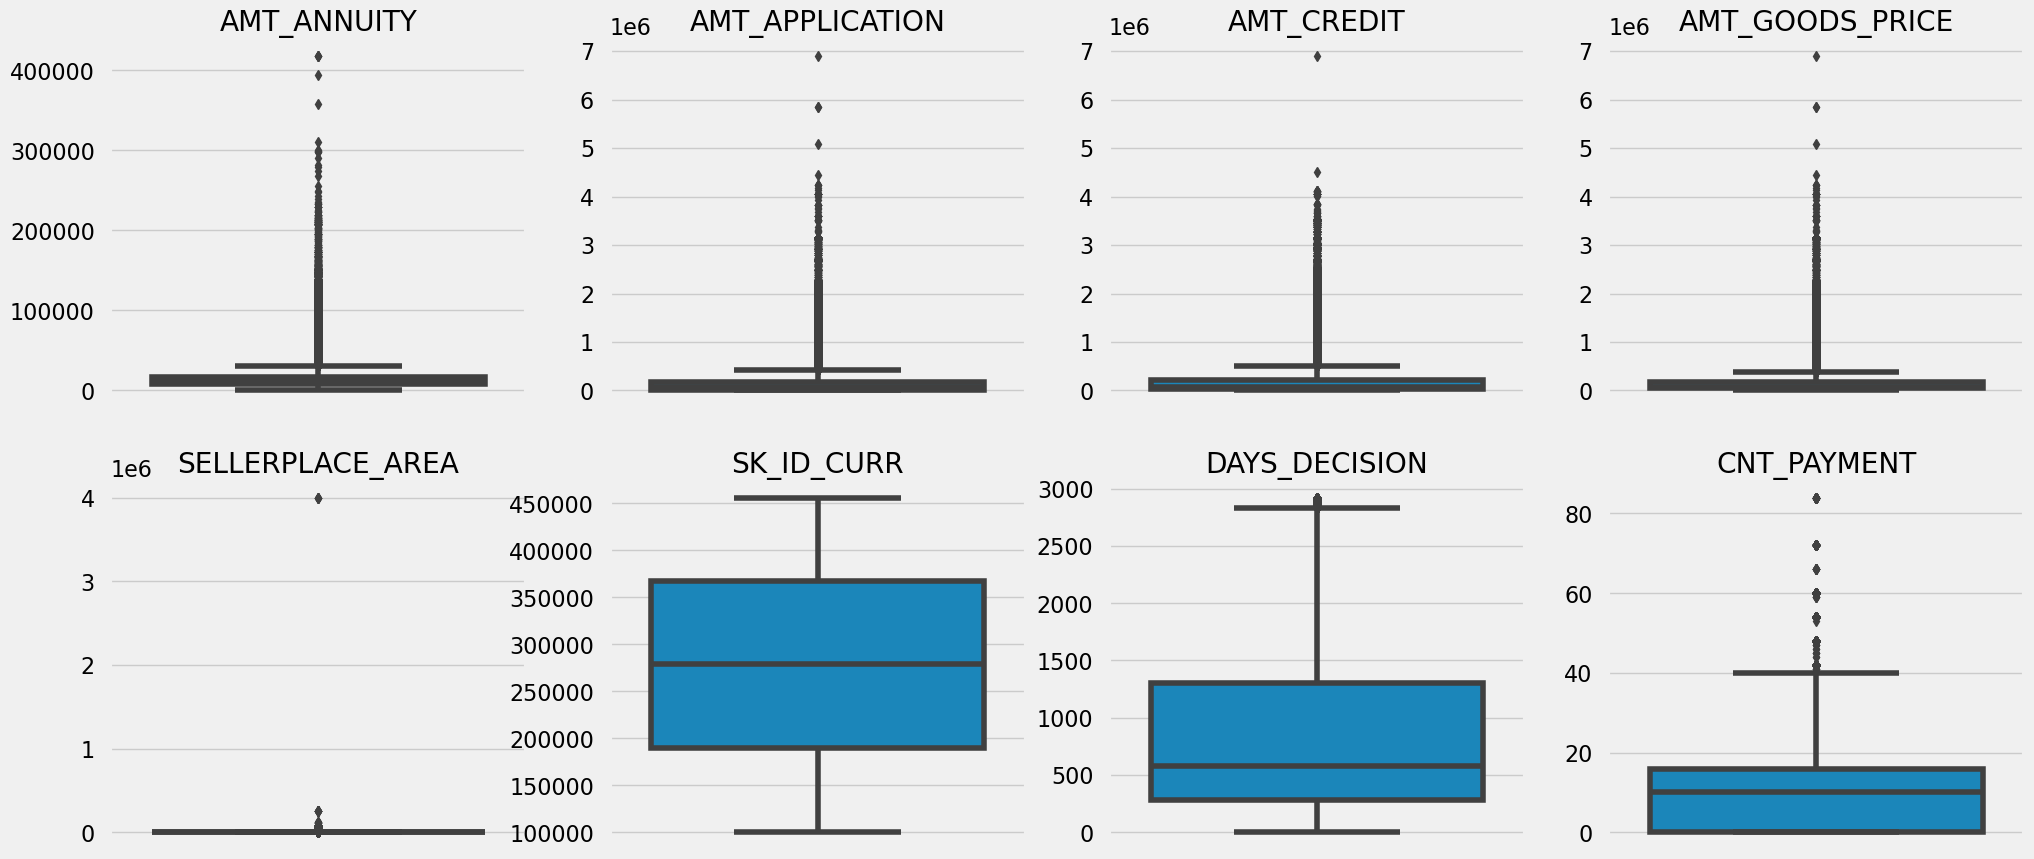

In [134]:
plt.figure(figsize=(22,10))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=pDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=pDF[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

#### Insight:

1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.

2. CNT_PAYMENT has few outlier values.

3. SK_ID_CURR is an ID column and hence no outliers.

4. DAYS_DECISION has few number of outliers indicating that these previous applications decisions were taken long back. 

In [136]:
pDF[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT',
            'DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06   
mean   1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05   
std    1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04   
50%    1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04   
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05   
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION  
count      1.670214e+06  1.670214e+06   1.670214e+06  
mean       3.139511e+02  1.247621e+01   8.806797e+02  
std        7.127443e+03  1.447588e+01   7.790997e+02  
min       -1.000000e+00  0.000000e+00   1.000000e+00  
25%       -1.000000e+00  0.000000e+00   2.800000e+02  
50%        3.000000e+00  1.000000e+01   5.810000e+02  
75%        8.200000e+01  1.600000e+01   1.300000e+03  
max        4.000000e+06  8.400000e+01   2.922000e+03

## Analysis:

#### 1. Data Imbalance Analysis;

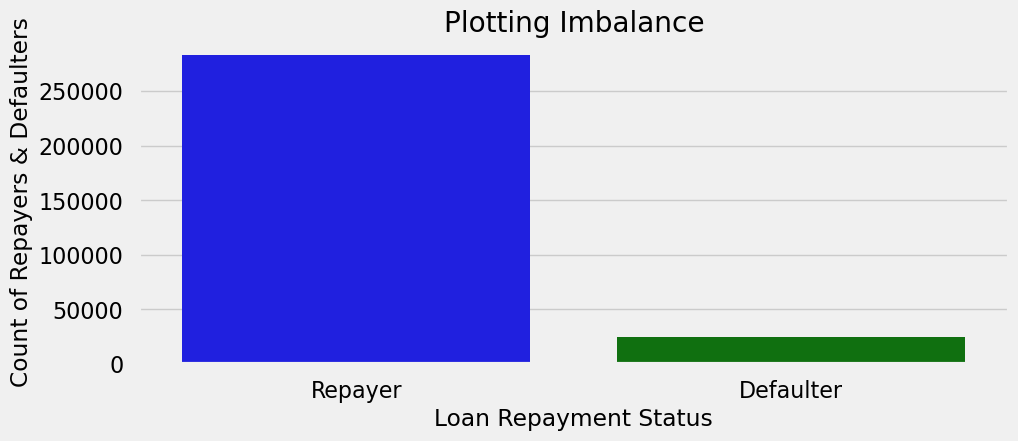

In [141]:
Imbalance = aDF["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ["b","g"])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Plotting Imbalance")
plt.show()


In [142]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


### Plotting Functions:
  
  Following are the common functions customized to perform uniform anaysis that is called for all plots:

In [151]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = aDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = aDF[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=aDF,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=["c","g"])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 13, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette="Paired")

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [152]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =["c","g"])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [153]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on aDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=aDF, 
                hue="TARGET",
                kind=kind,
                palette = ["c","g"],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [154]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [155]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =["c","g"])
   # plt.legend(['Repayer','Defaulter'])

### Univariate Analysis:

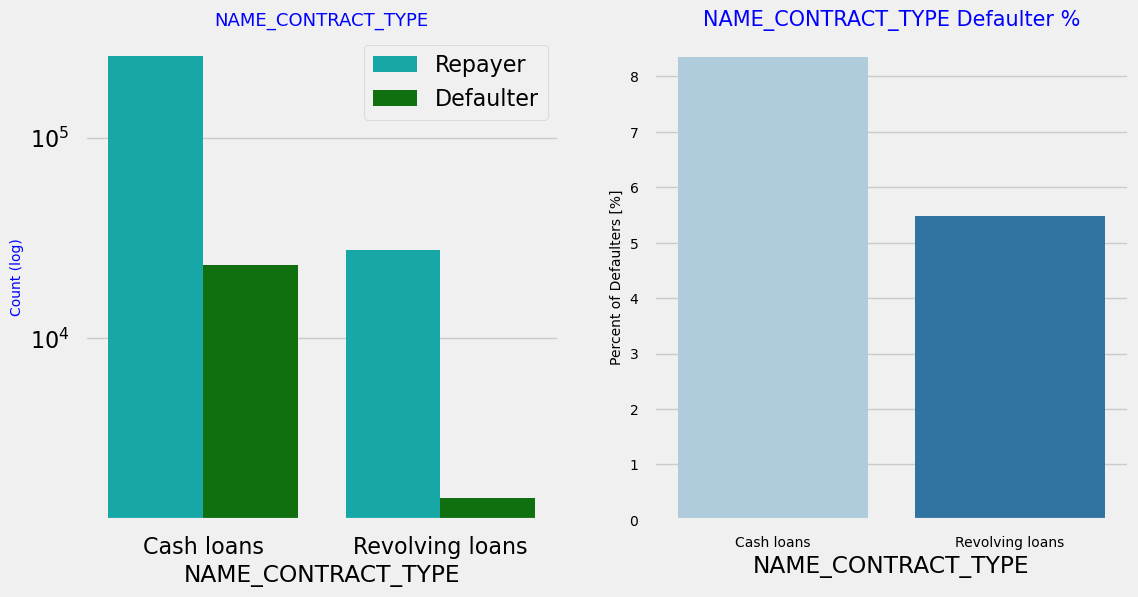

In [156]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

#### Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

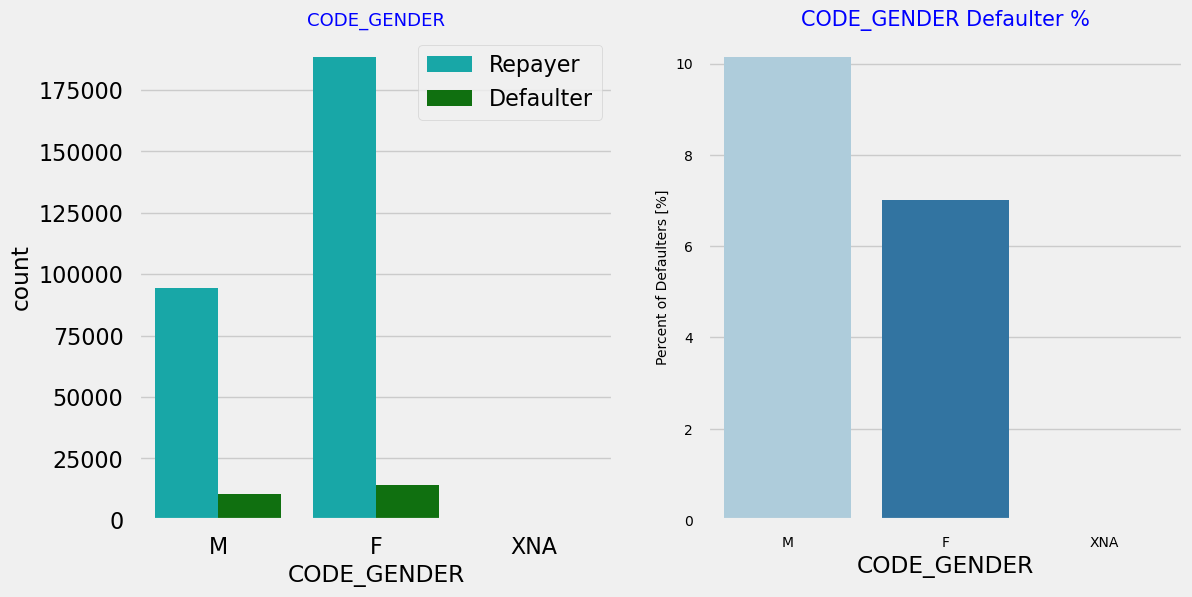

In [157]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

#### The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (7%)

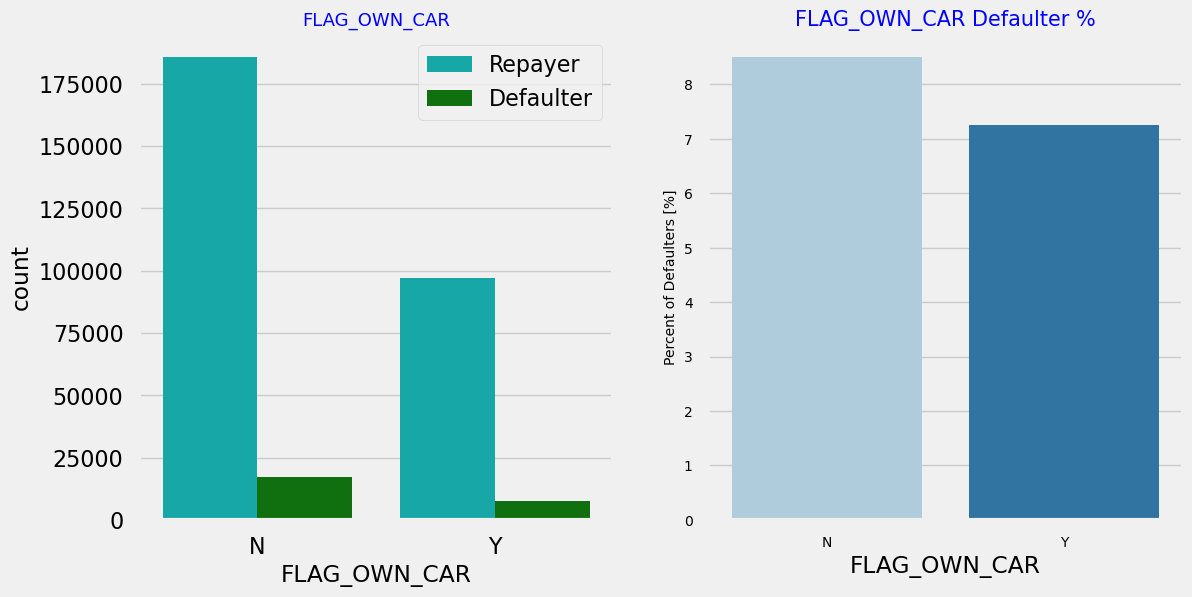

In [158]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

#### Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

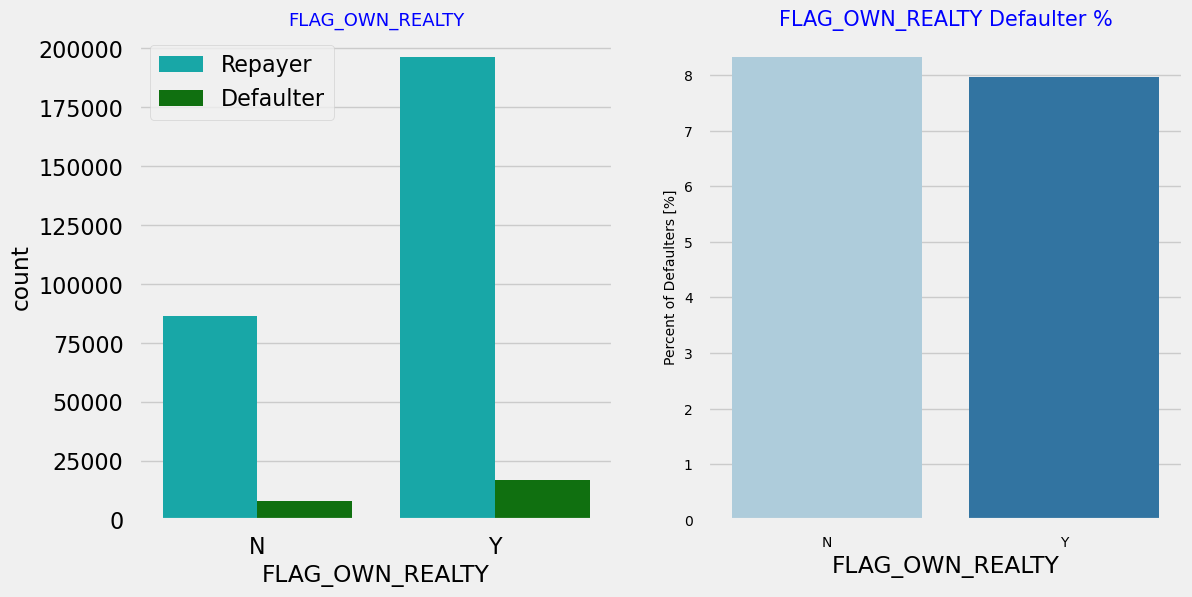

In [159]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

#### The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.

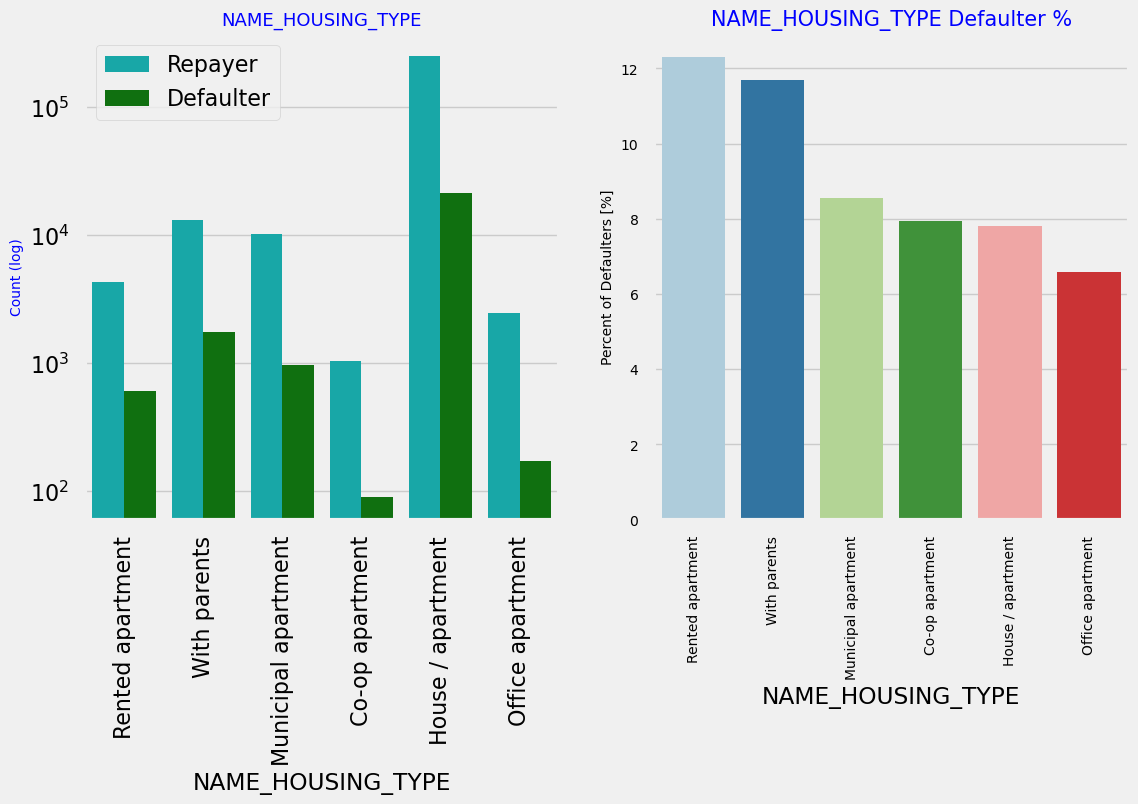

In [160]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

#### Observations:


    1.Majority of people live in House/apartment

    2.People living in office apartments have lowest default rate

    3.People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

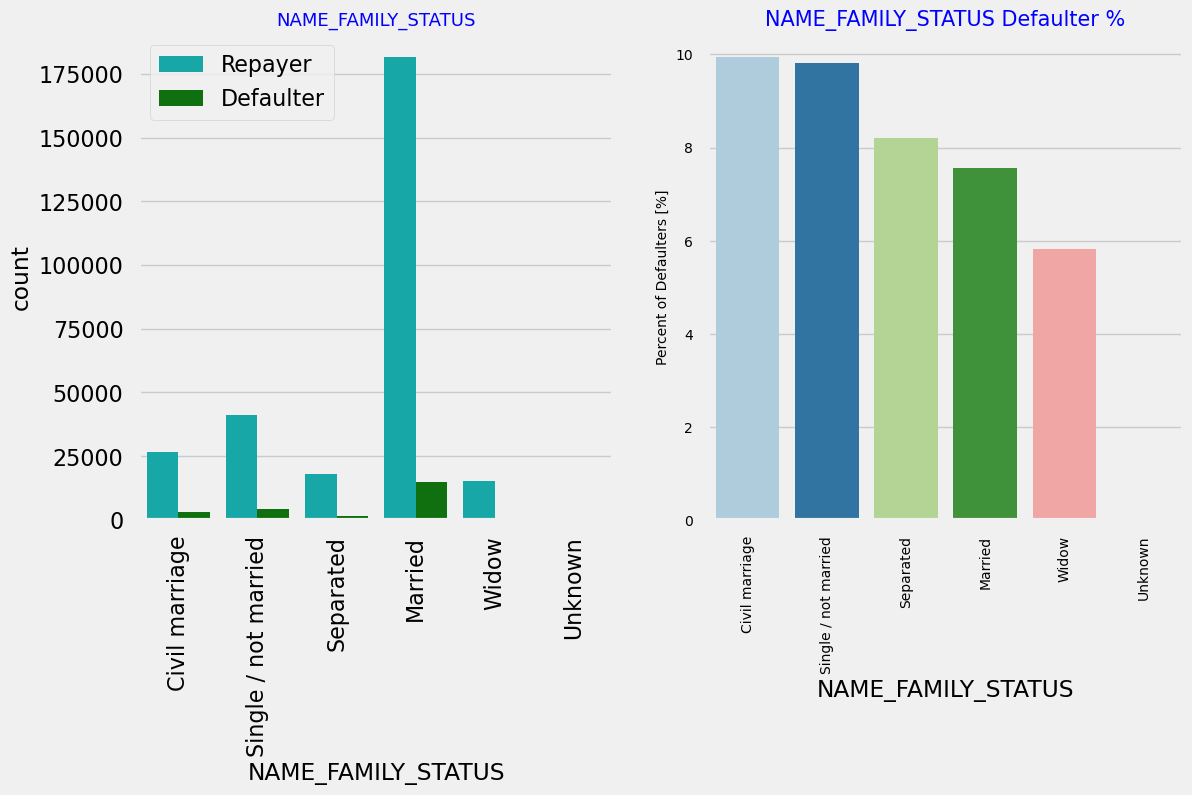

In [161]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

#### 
    Most of the people who have taken loan are married, followed by Single/not married and civil marriage
    In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

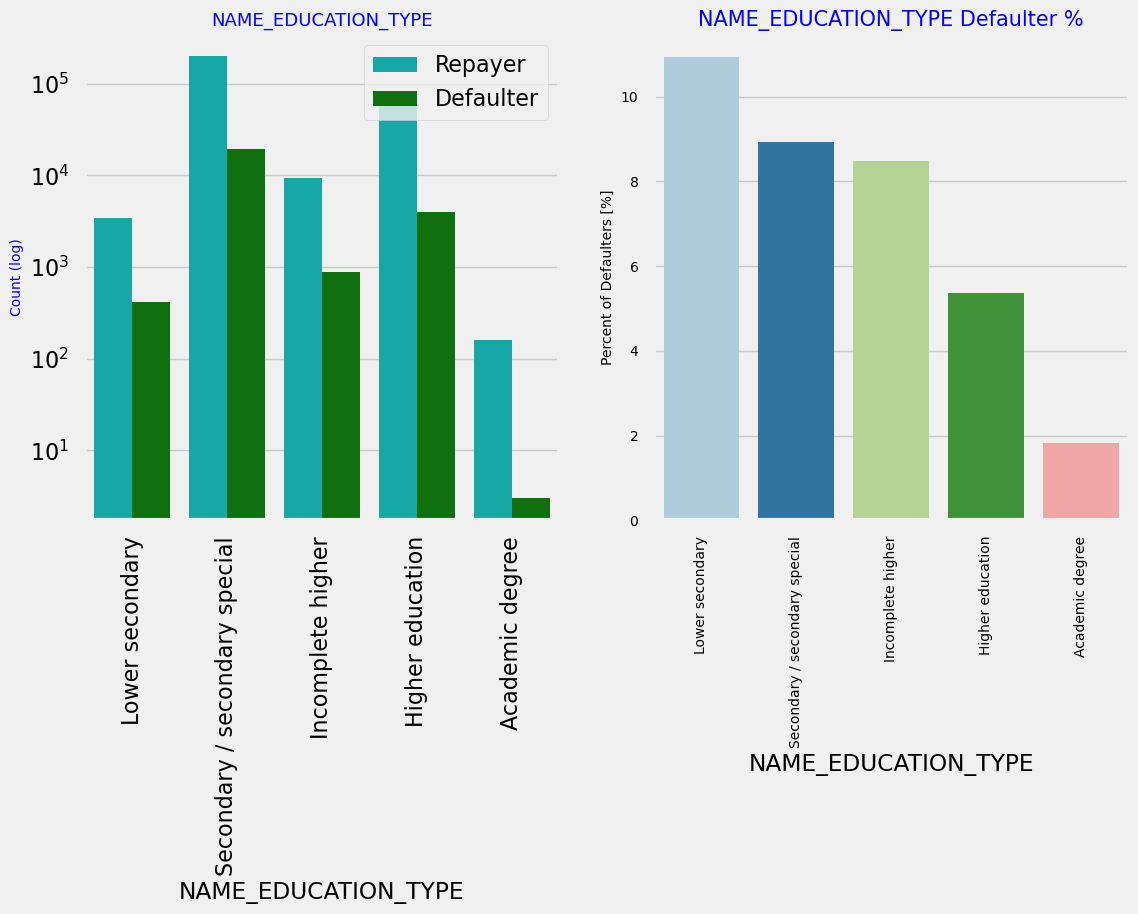

In [162]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

    #### 1.Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree

    2.The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.

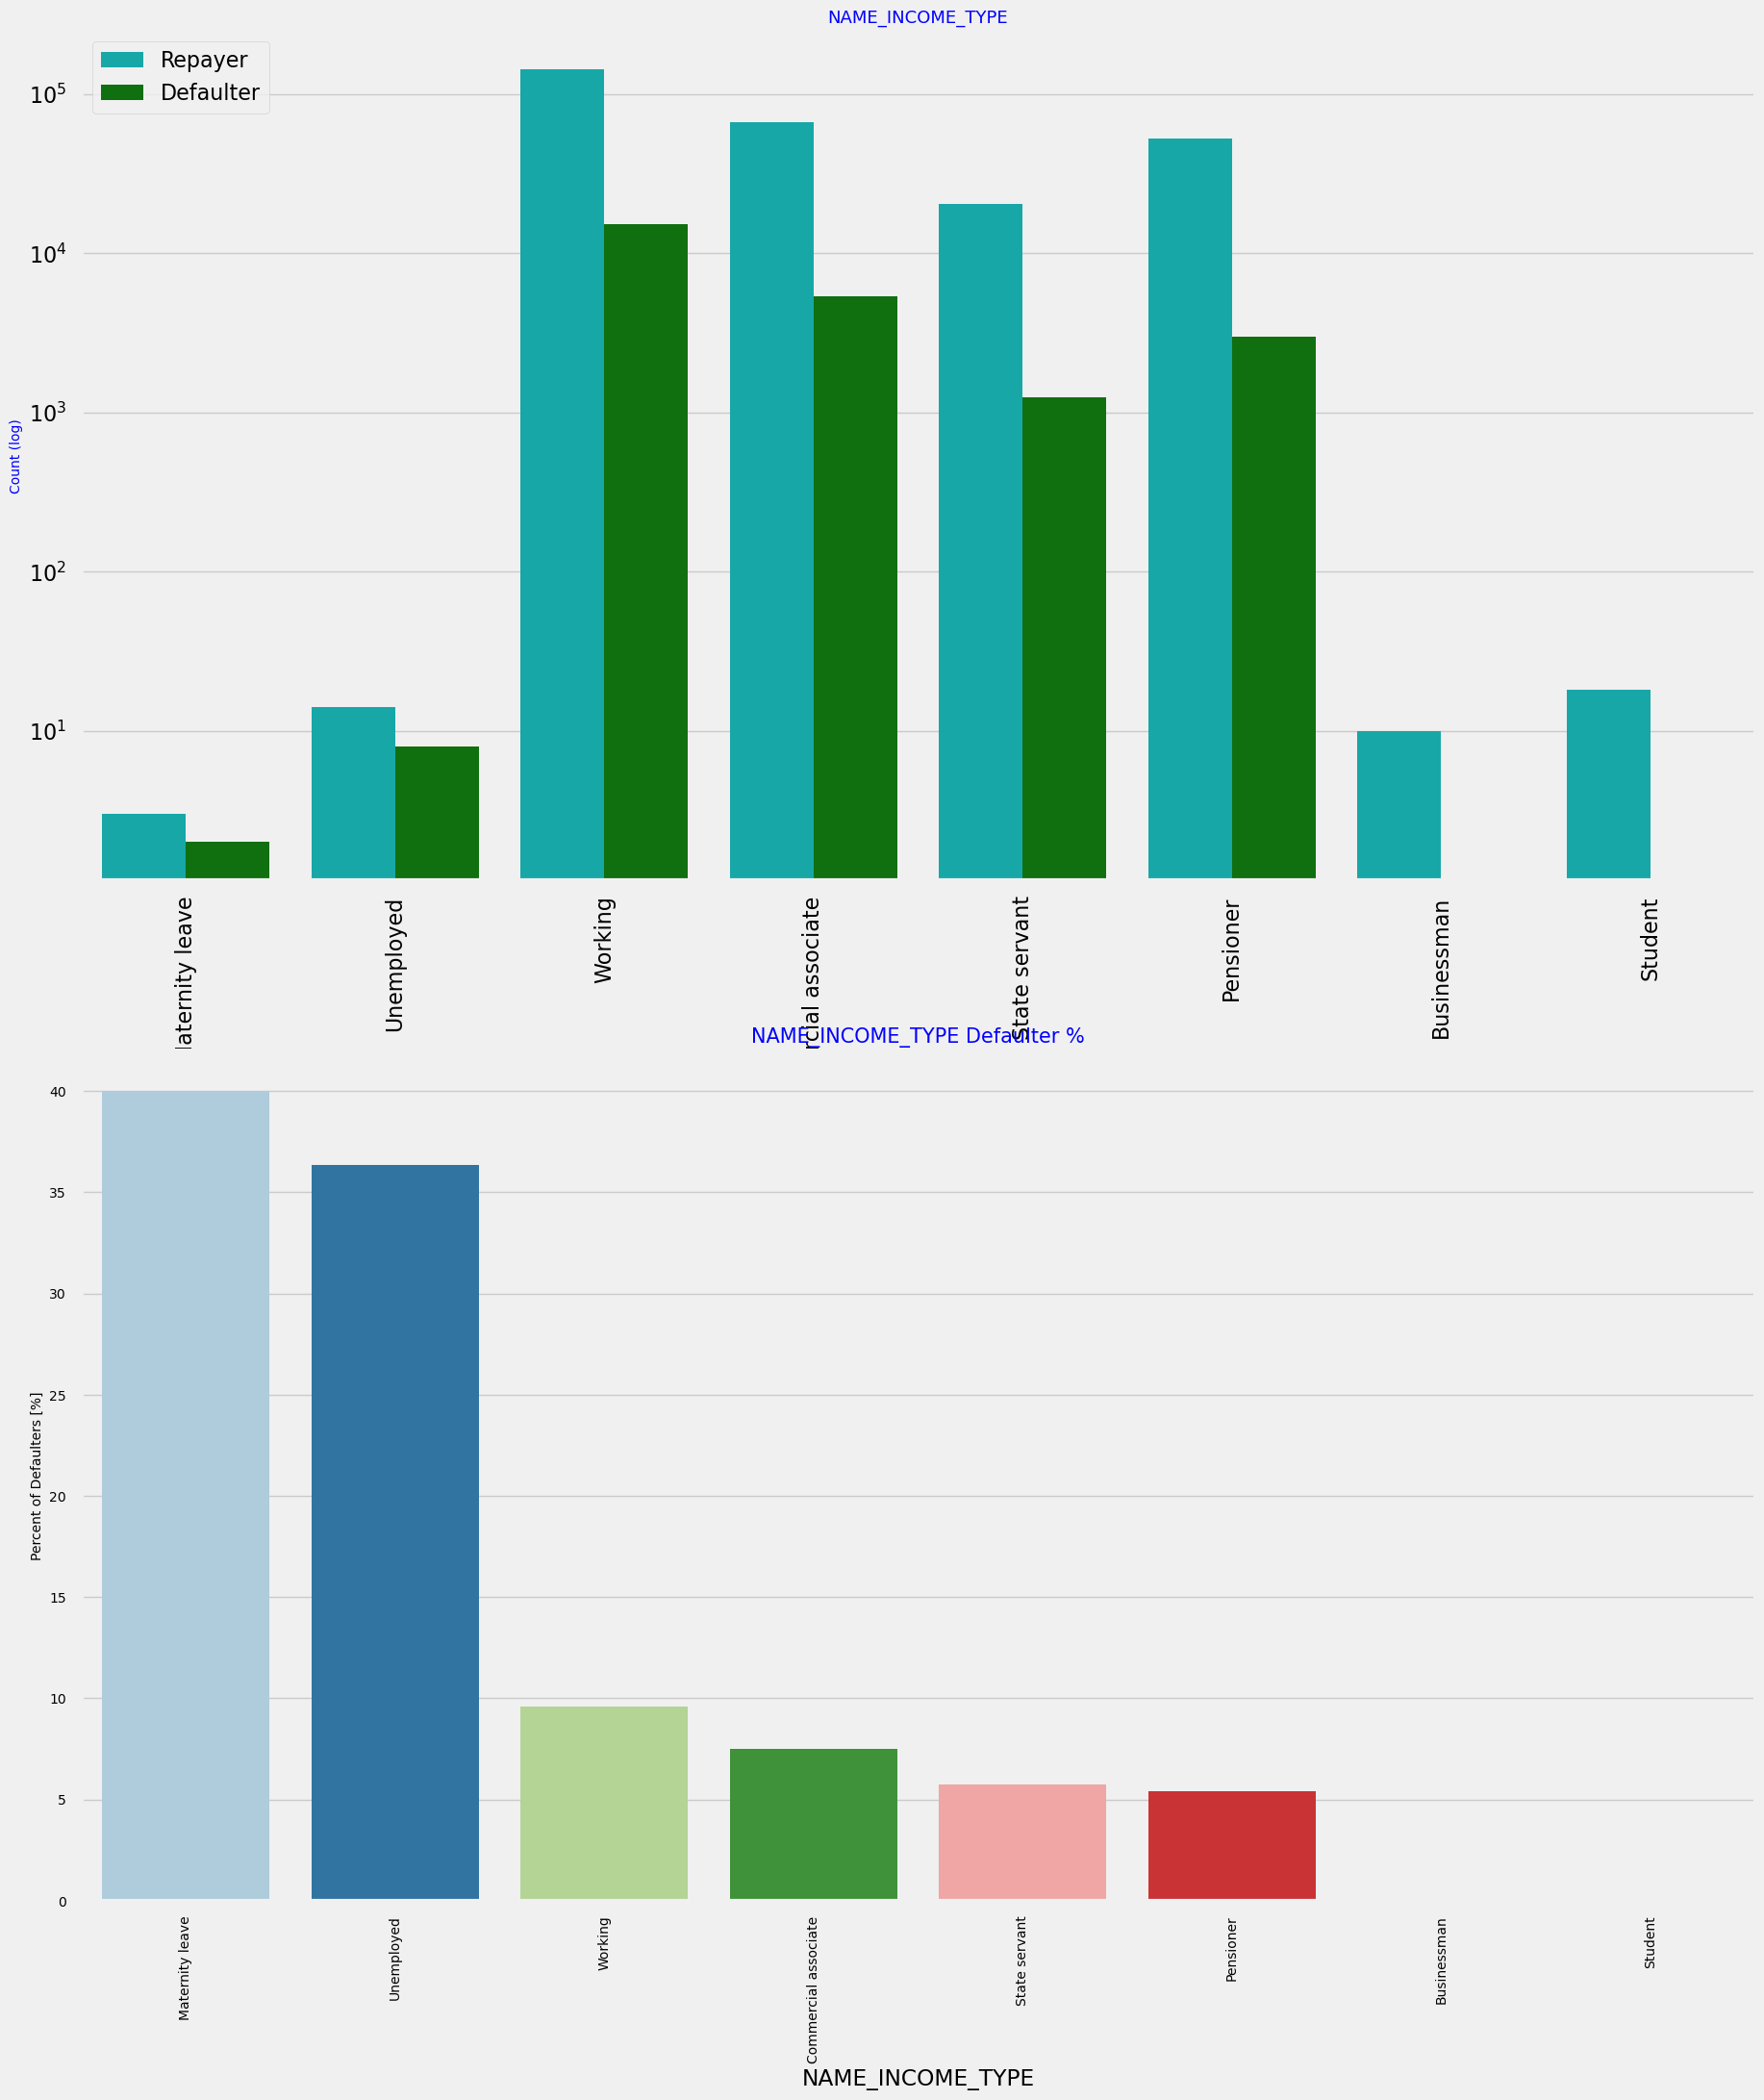

In [163]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

####  
    1.Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
    2.The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
    3.Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

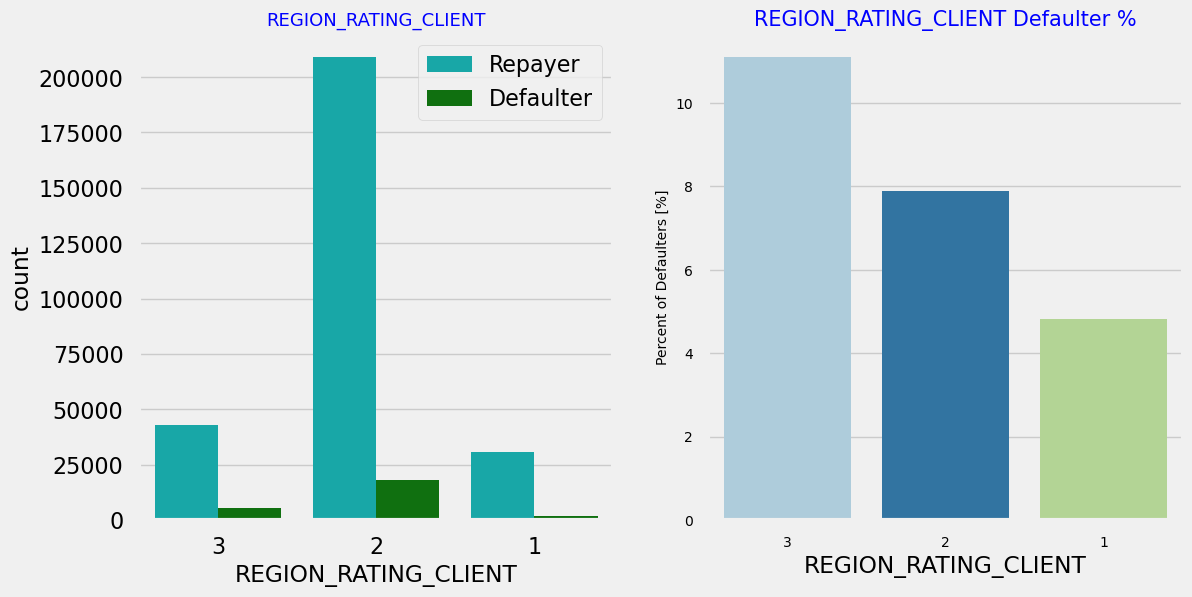

In [164]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

#### OBSERVATIONS
    1.Most of the applicants are living in Region_Rating 2 place.

    2.Region Rating 3 has the highest default rate (11%).

    3.Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans.

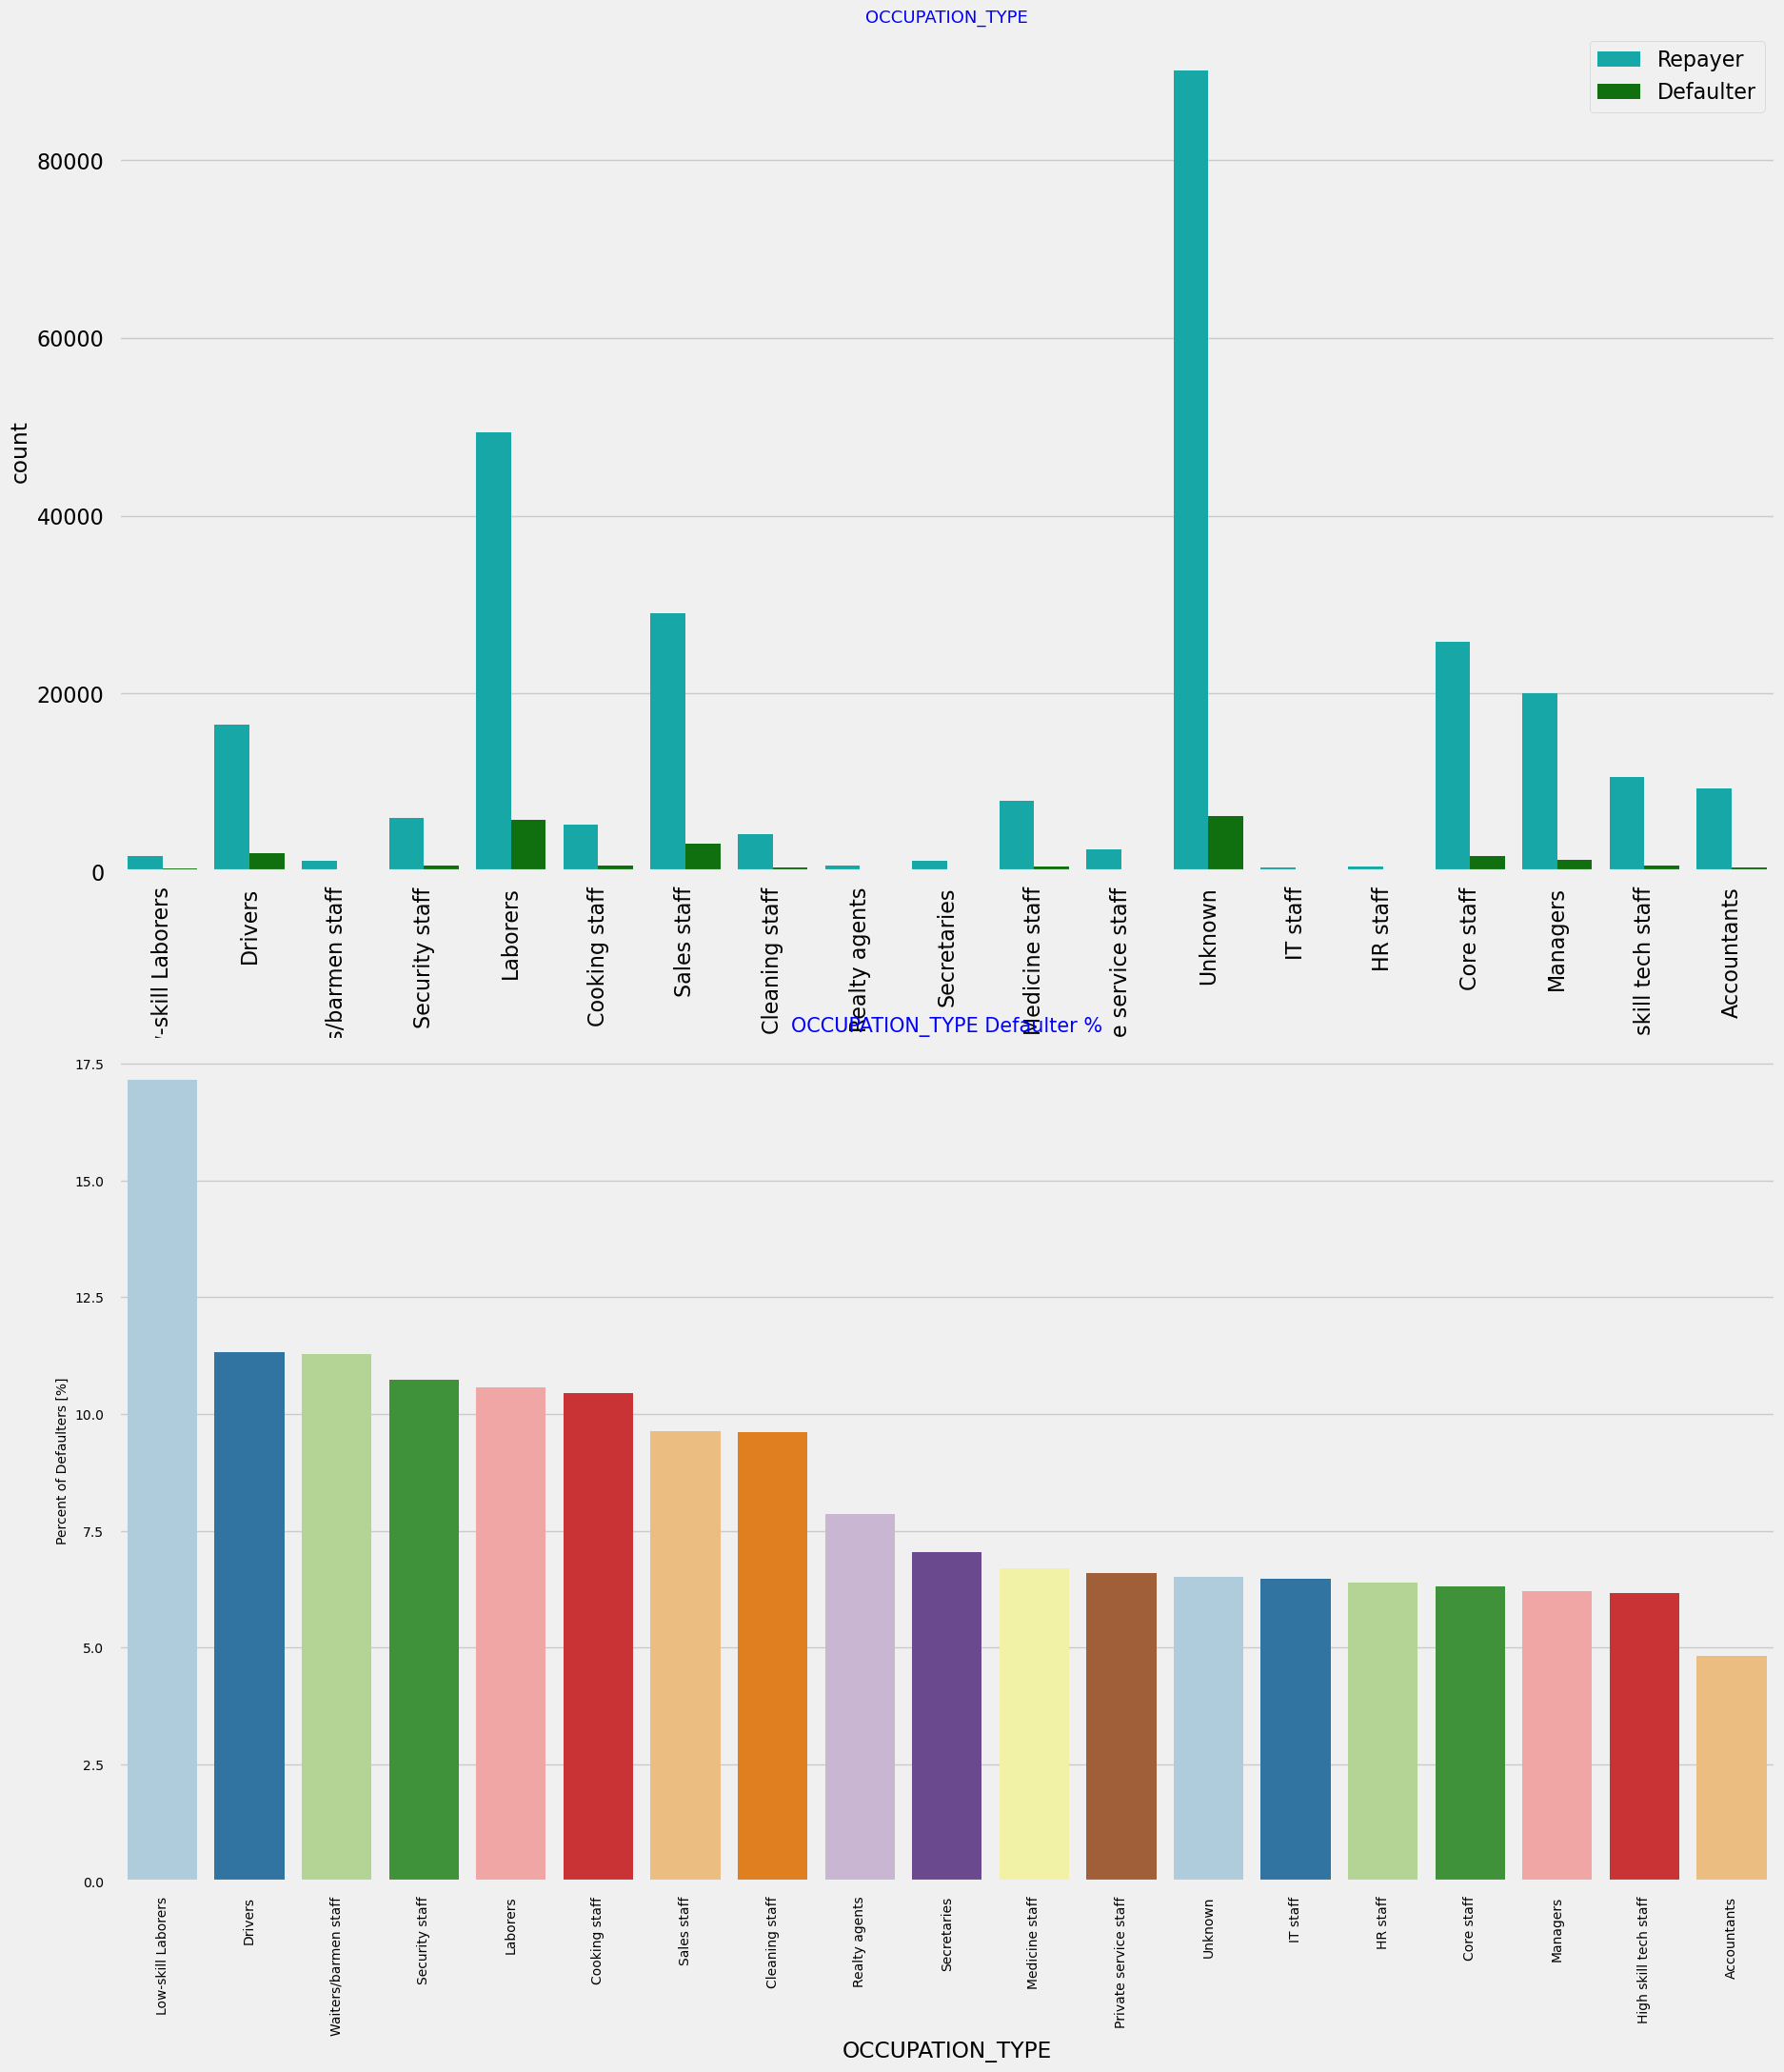

In [165]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

#### OBSERVATIONS:
    1.Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
    2.The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

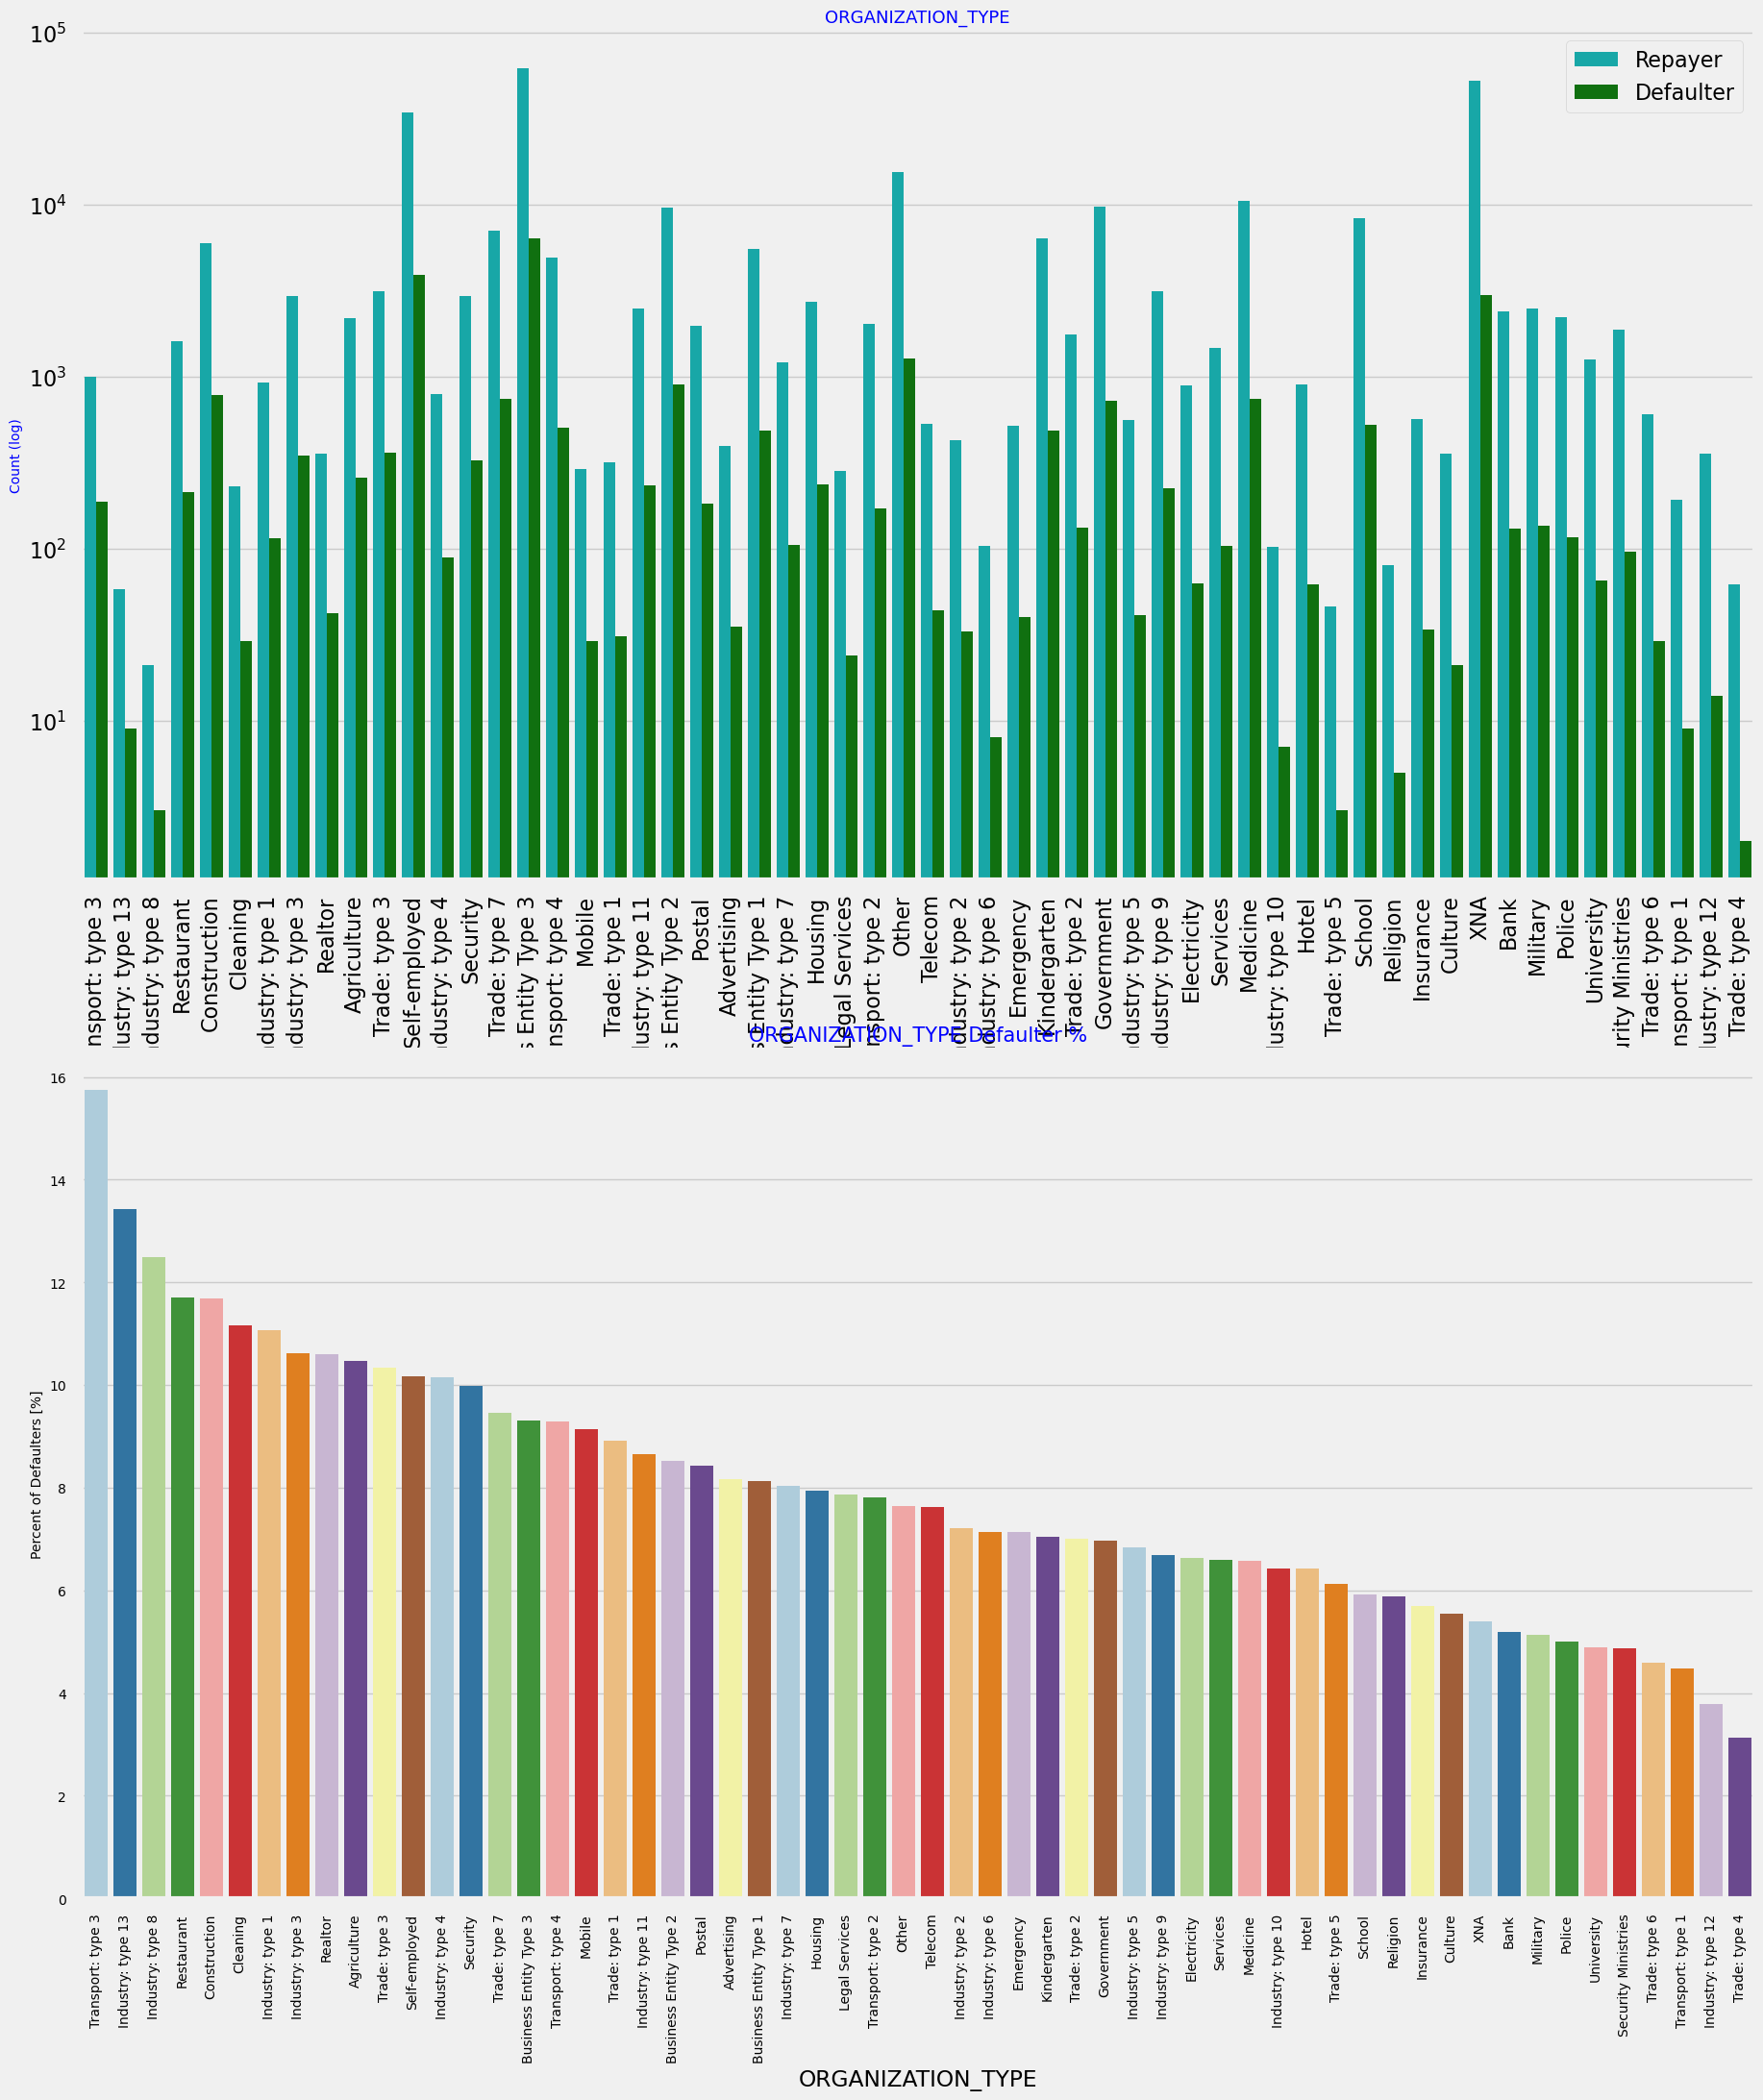

In [166]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

#### OBSERVATIONS:
    1.Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
    2.Most of the people application for loan are from Business Entity Type 3.
    3.For a very high number of applications, Organization type information is unavailable(XNA).

###### It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:¶1.Trade Type 4 and 6 2.Industry type 12 3.Transport type 1

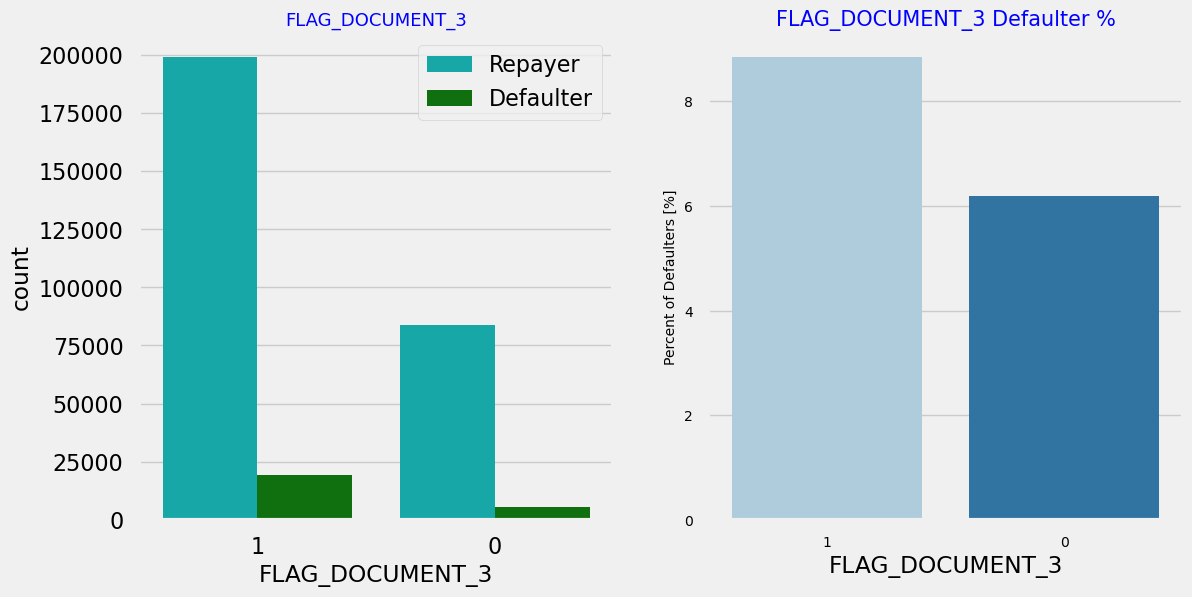

In [167]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

#### OBSERVATIONS:
There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)

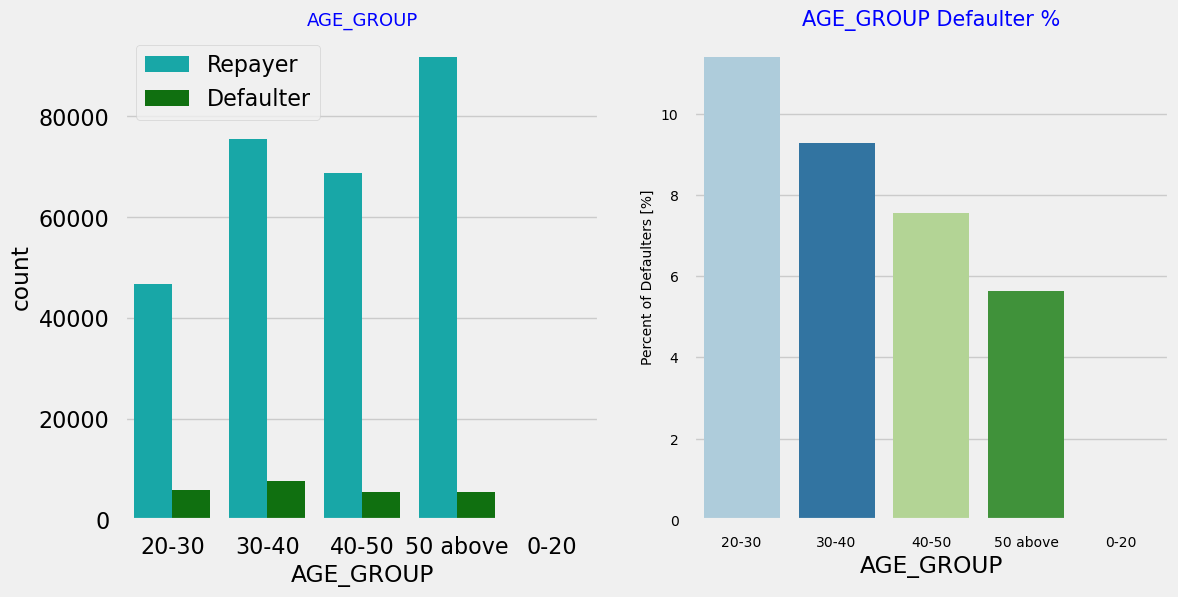

In [168]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

#### People in the age group range 20-40 have higher probability of defaulting. People above age of 50 have low probability of defailting.

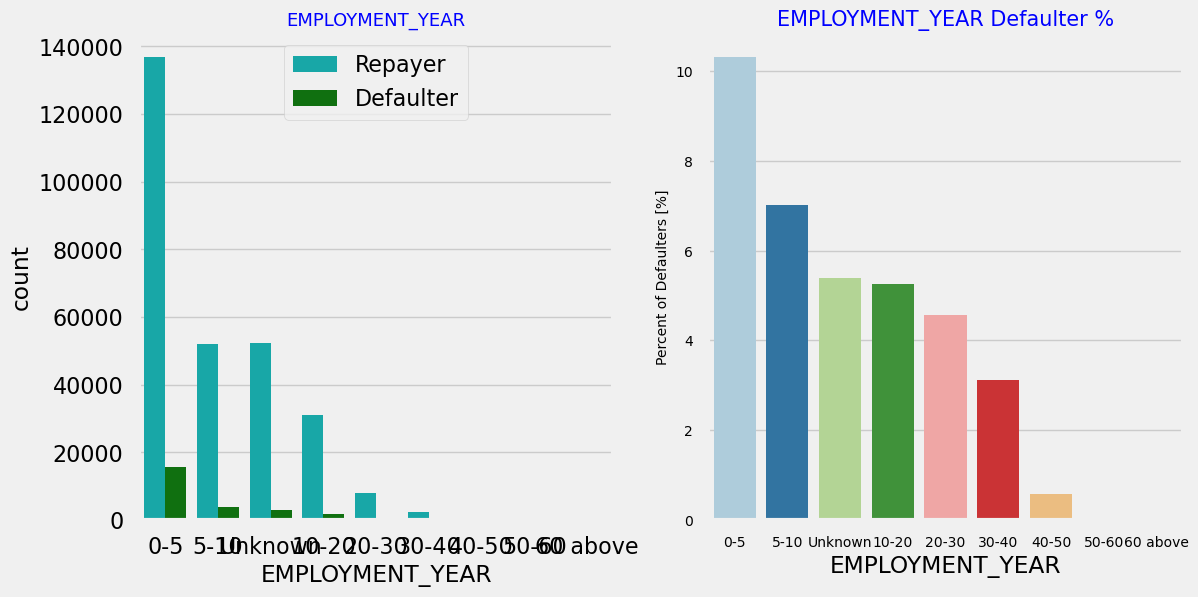

In [169]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

#### OBSERVATIONS:
    1.Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%
    2.With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

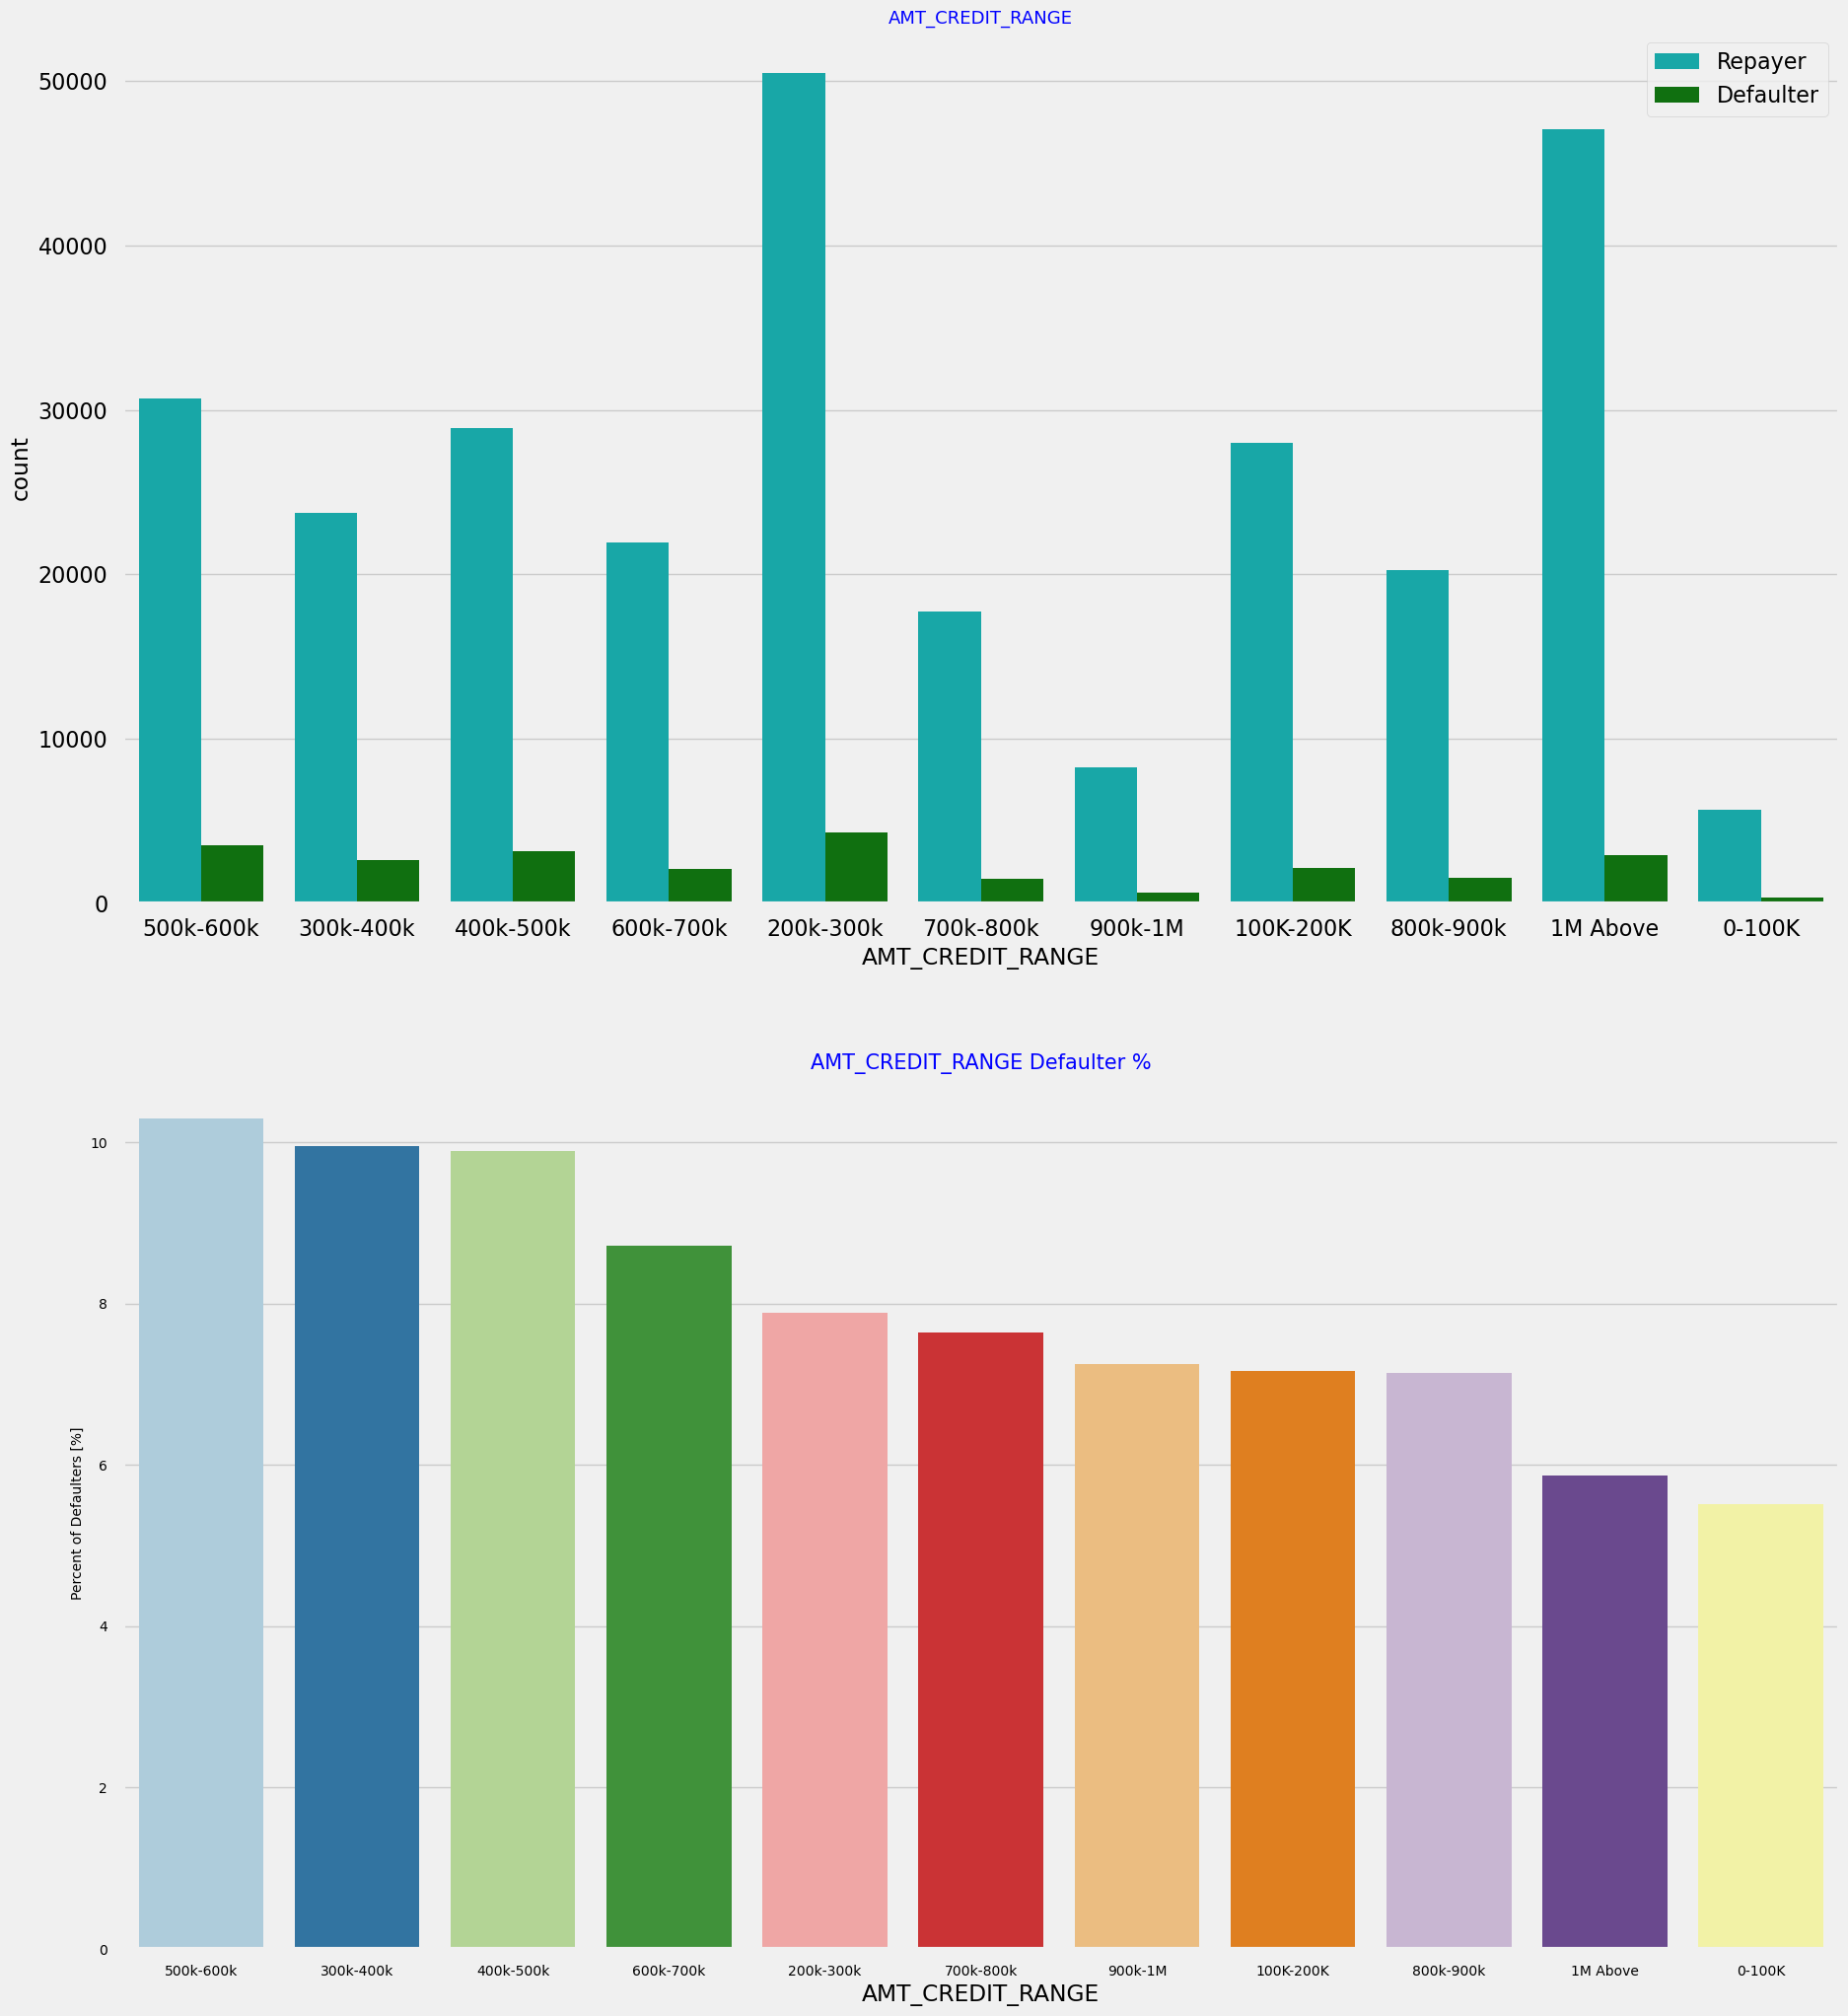

In [170]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

#### OBSERVATIONS:
    1.More than 80% of the loan provided are for amount less than 900,000
    2.People who get loan for 300-600k tend to default more than others

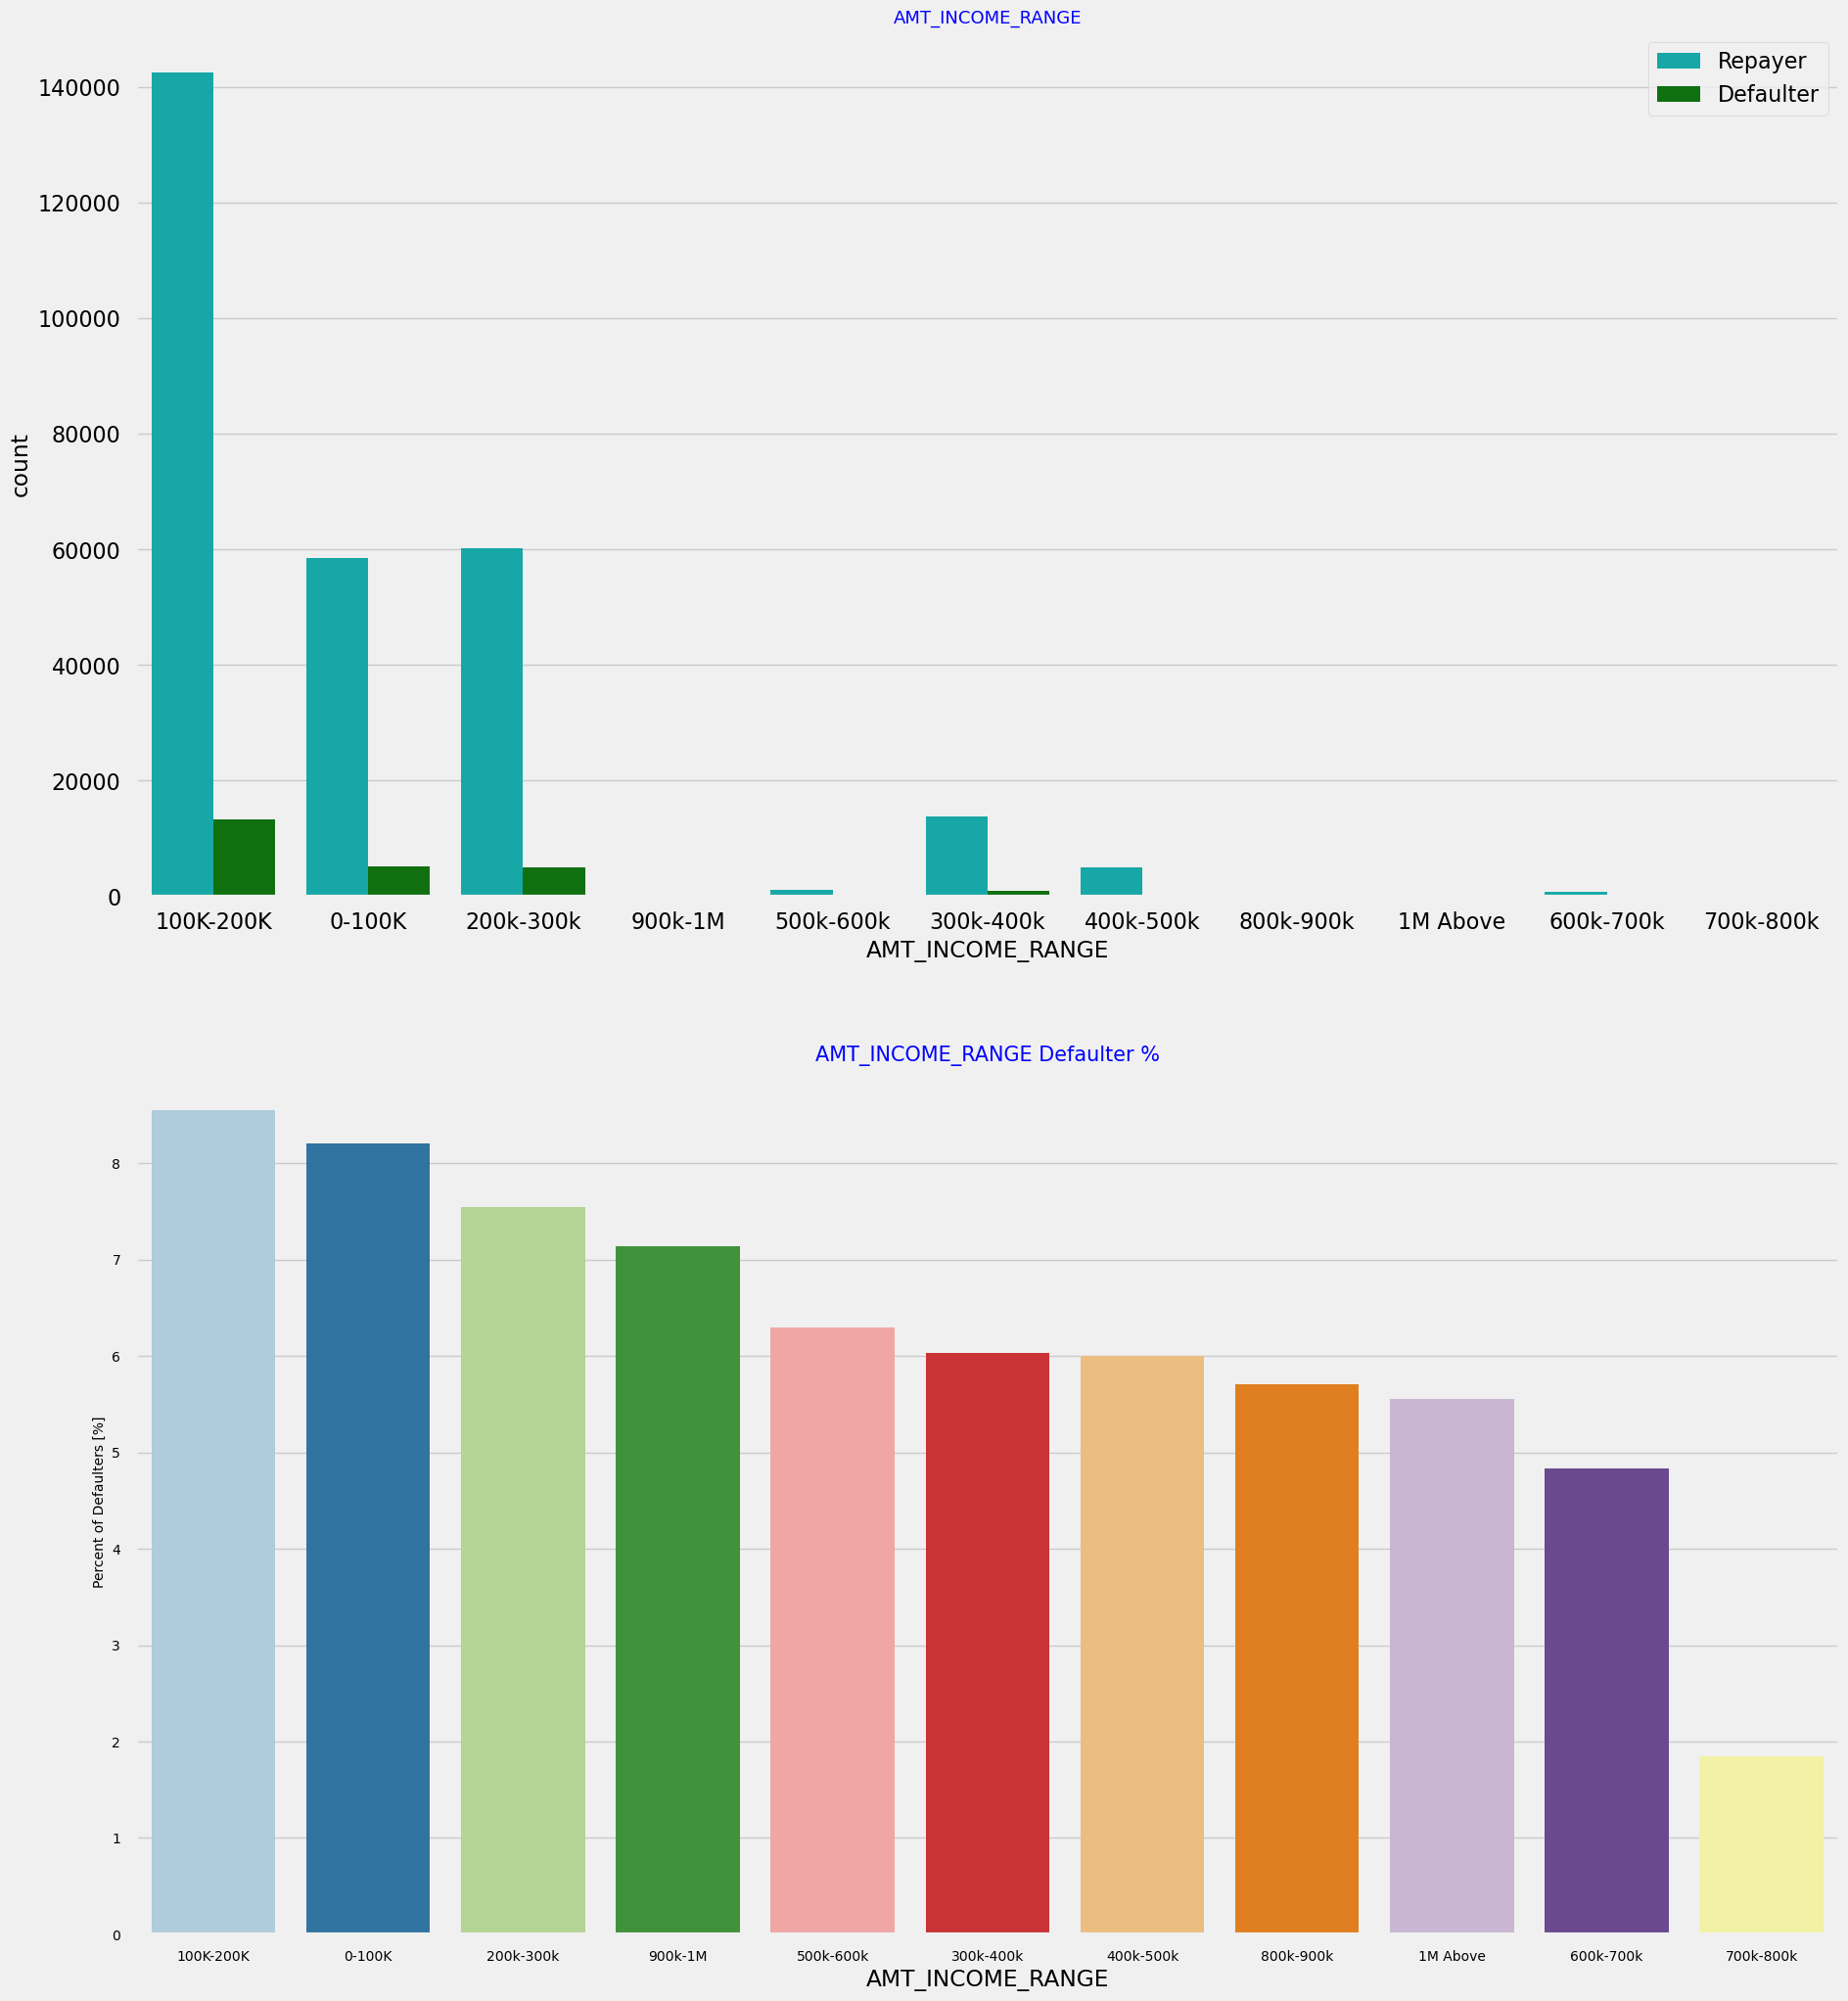

In [171]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

#### OBSERVATIONS:
    1.90% of the applications have Income total less than 300,000
    2.Application with Income less than 300,000 has high probability of defaulting
    3.Applicant with Income more than 700,000 are less likely to default

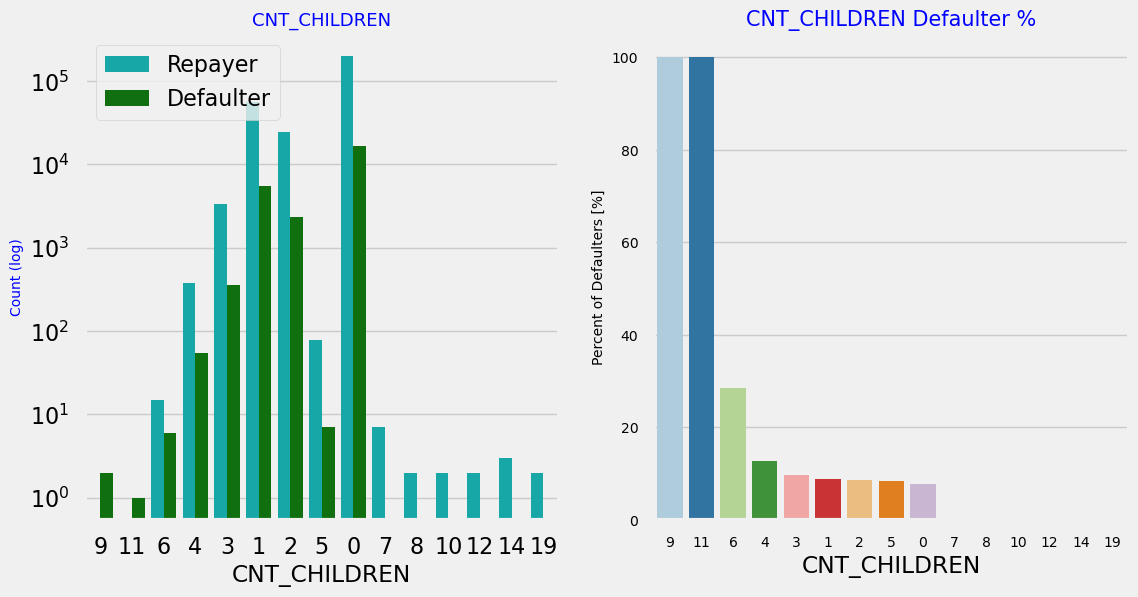

In [172]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

#### OBSERVATIONS:
    1.Most of the applicants do not have children
    2.Very few clients have more than 3 children.
    3.Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

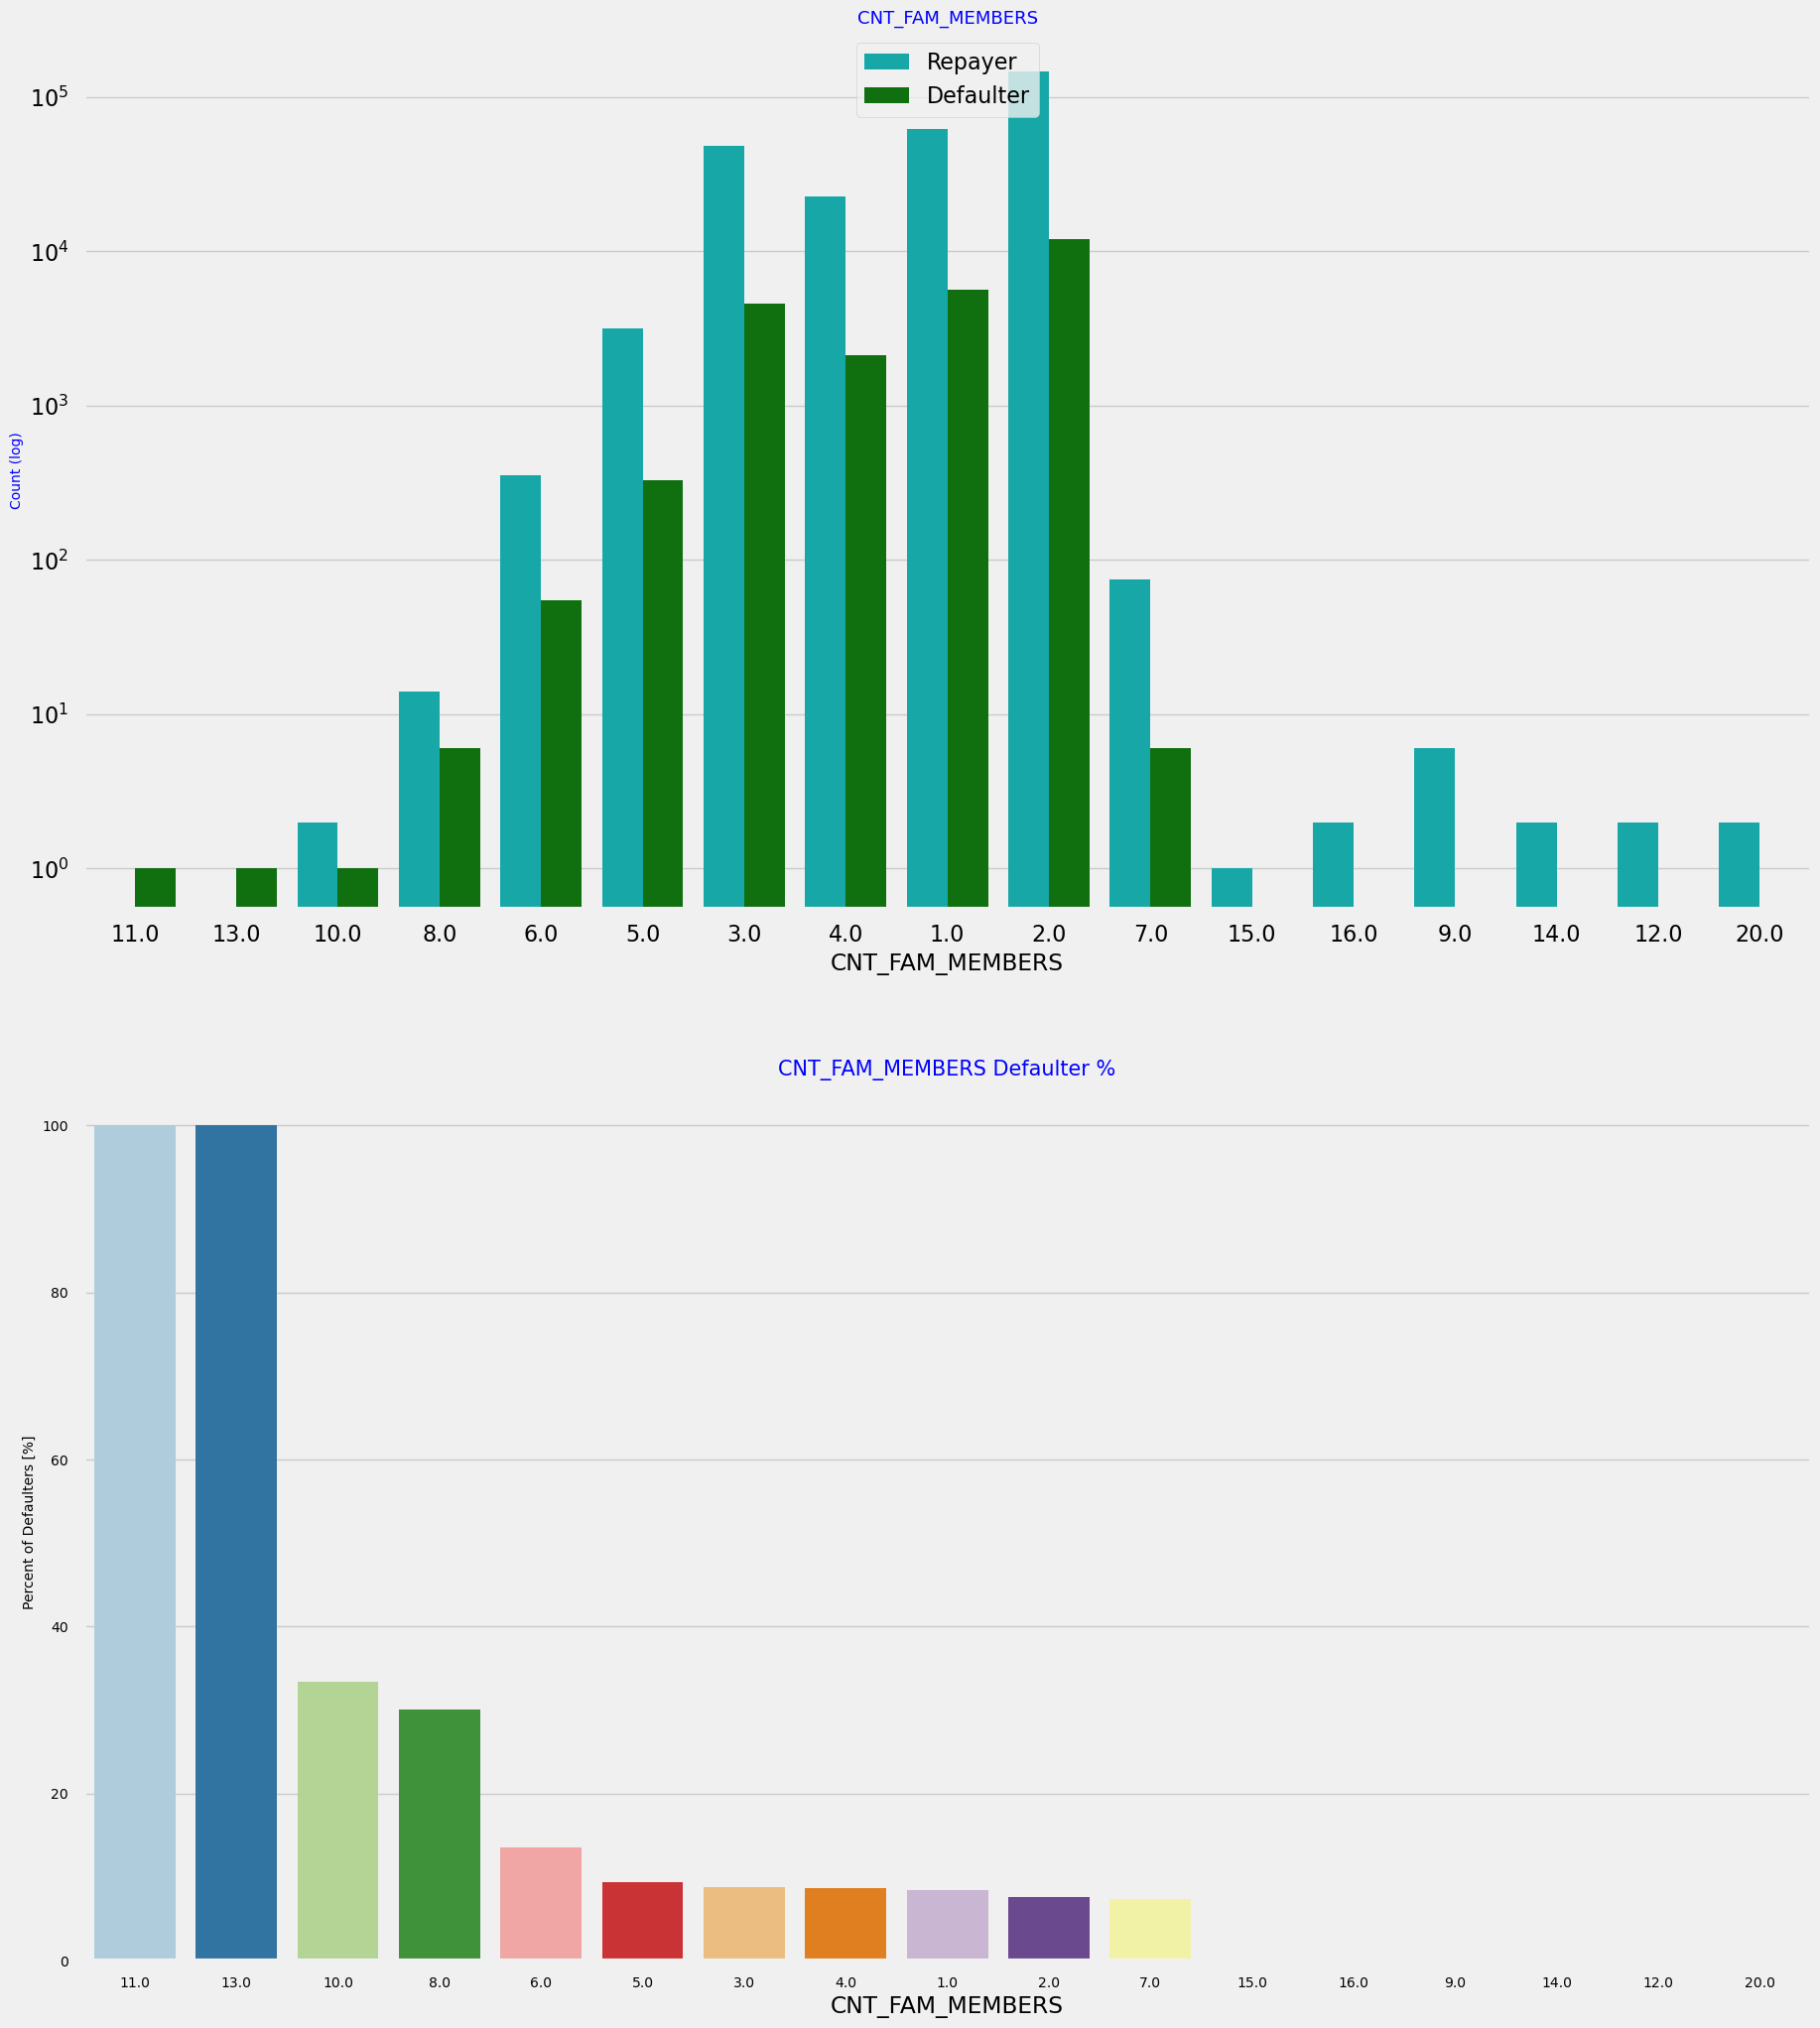

In [173]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

#### OBSERVATIONS:
Family member follows the same trend as children where having more family members increases the risk of defaulting.

#### Bivariate Analysis

In [174]:
aDF.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%  \
NAME_INCOME_TYPE                                                            
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500   
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000   
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000   
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700   
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750   
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750   
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875   
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500   

                          75%        max  
NAME_INCOME_TYPE                          
Businessman           8.43750    22.5000  
Commercial associate  2.25000   180.0009  
Maternity leave       1.35000     3.6000  
Pensioner             1.66500    22.5000  
State servant         2.25000    31.5000  
Student               1.78875     5.6250  
Unemployed            1.35000     3.3750  
Working               2.02500  1170.0000

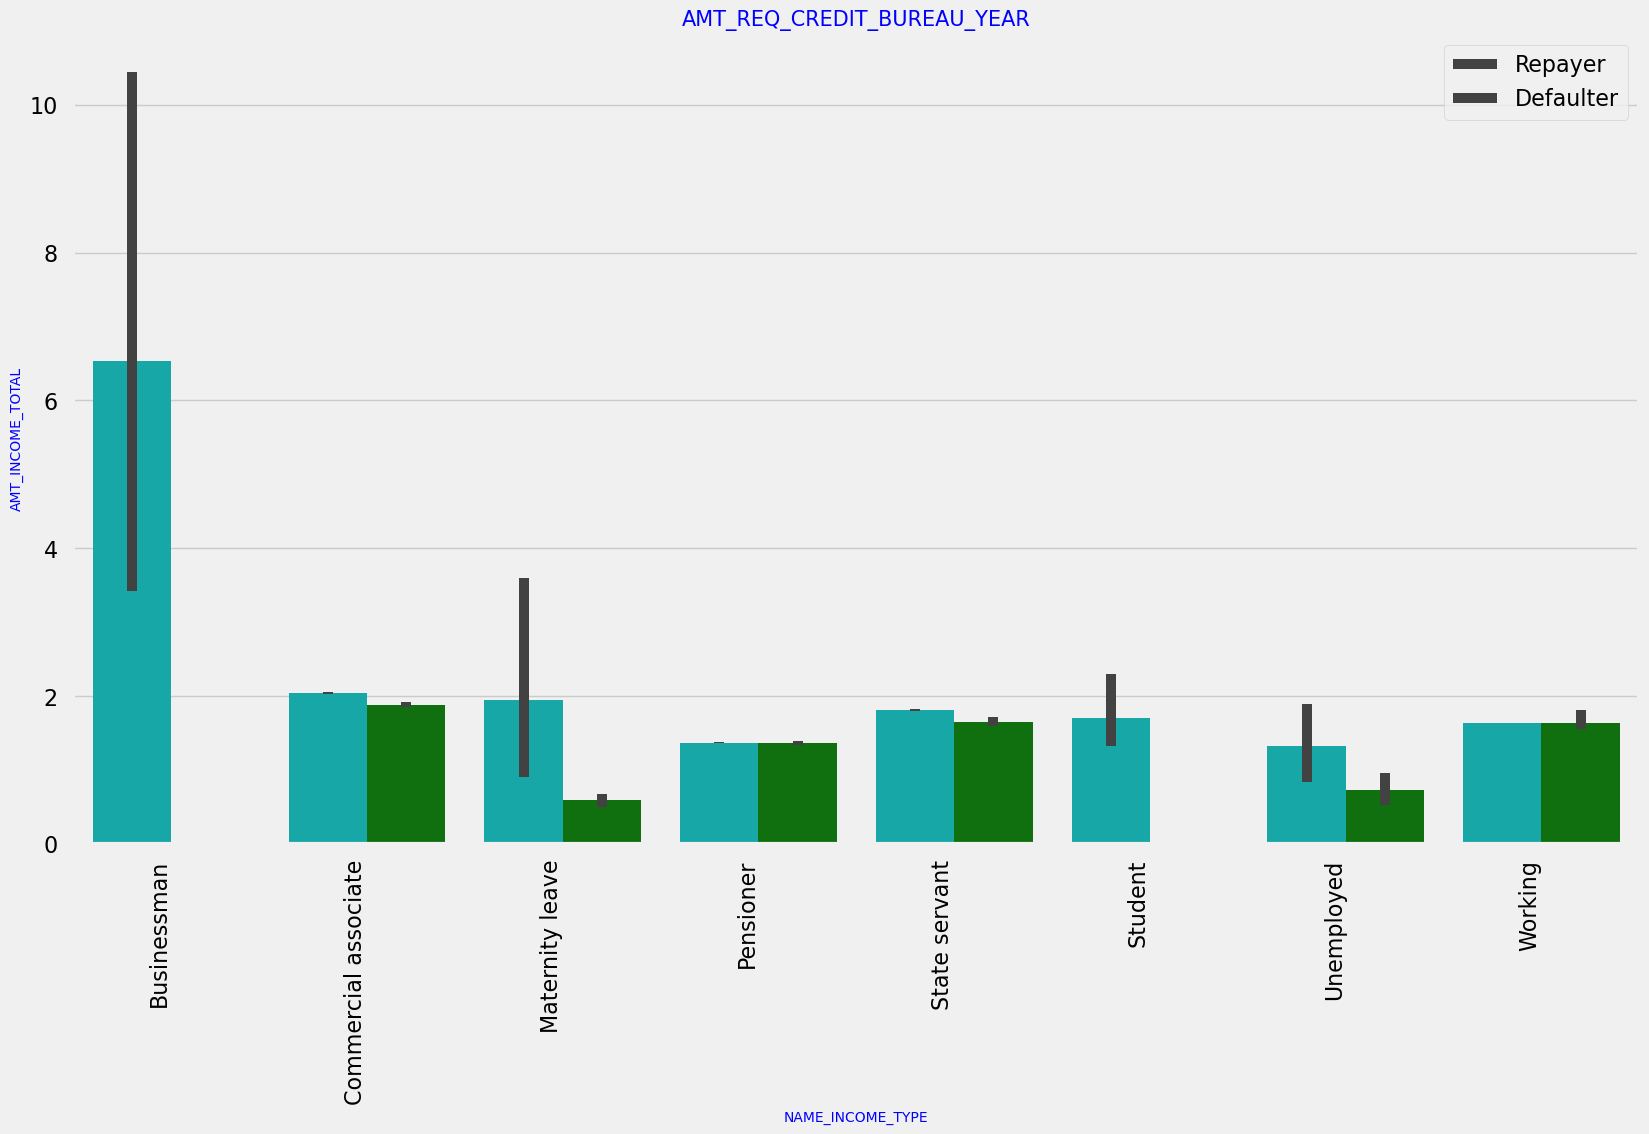

In [175]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",aDF,"TARGET",(18,10))

#### It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs.

### Correlation Analysis

In [176]:
aDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [177]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = aDF.loc[aDF['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = aDF.loc[aDF['TARGET']==1, cols_for_correlation] # Defaulters

In [178]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
71         AMT_ANNUITY        AMT_CREDIT     0.771309
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
138         DAYS_BIRTH      CNT_CHILDREN     0.336966
190  DAYS_REGISTRATION        DAYS_BIRTH     0.333151

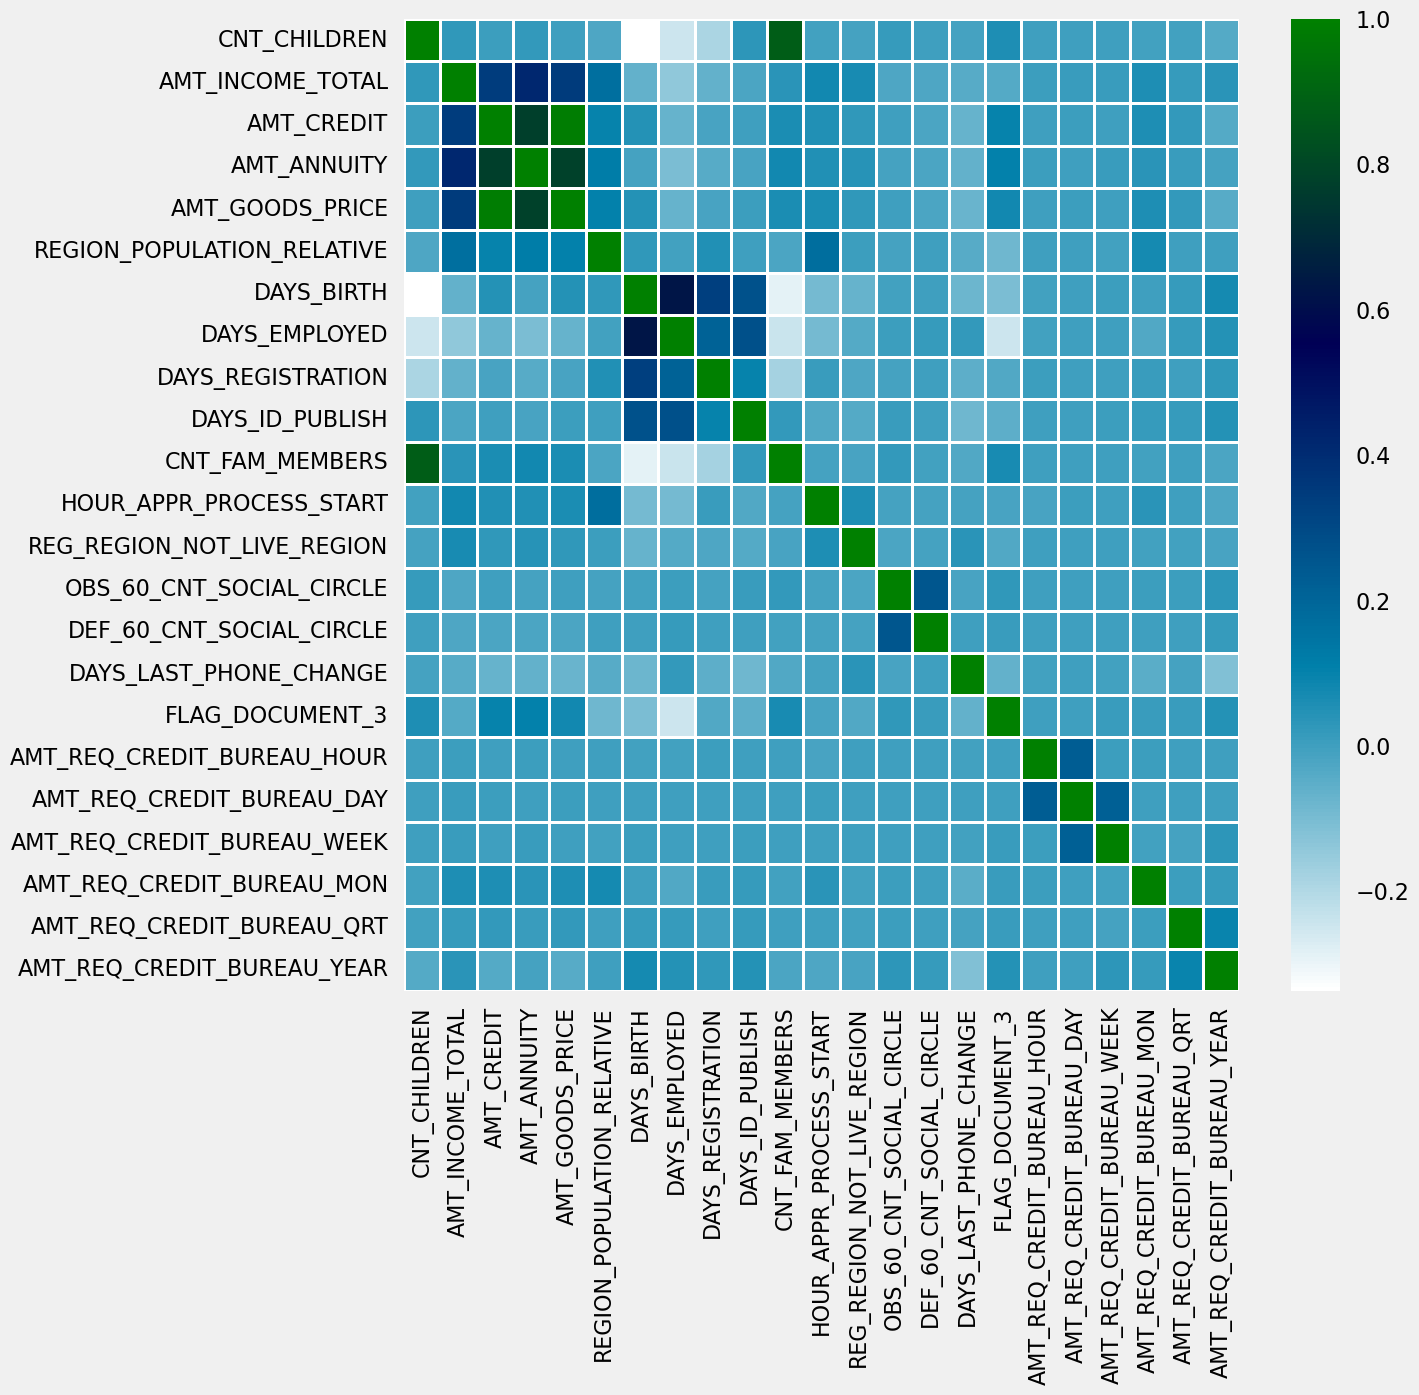

In [181]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="ocean_r",annot=False,linewidth =1)

#### Credit amount is highly correlated with

    1.amount of goods price
    2.loan annuity
    3.total income

We can also see that repayers have high correlation in number of days employe

In [182]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

VAR1                      VAR2  Correlation
94            AMT_GOODS_PRICE                AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE               AMT_ANNUITY     0.752699
71                AMT_ANNUITY                AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                DAYS_BIRTH     0.582185
190         DAYS_REGISTRATION                DAYS_BIRTH     0.289114
375           FLAG_DOCUMENT_3             DAYS_EMPLOYED     0.272169
335  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.264159
138                DAYS_BIRTH              CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                DAYS_BIRTH     0.252863

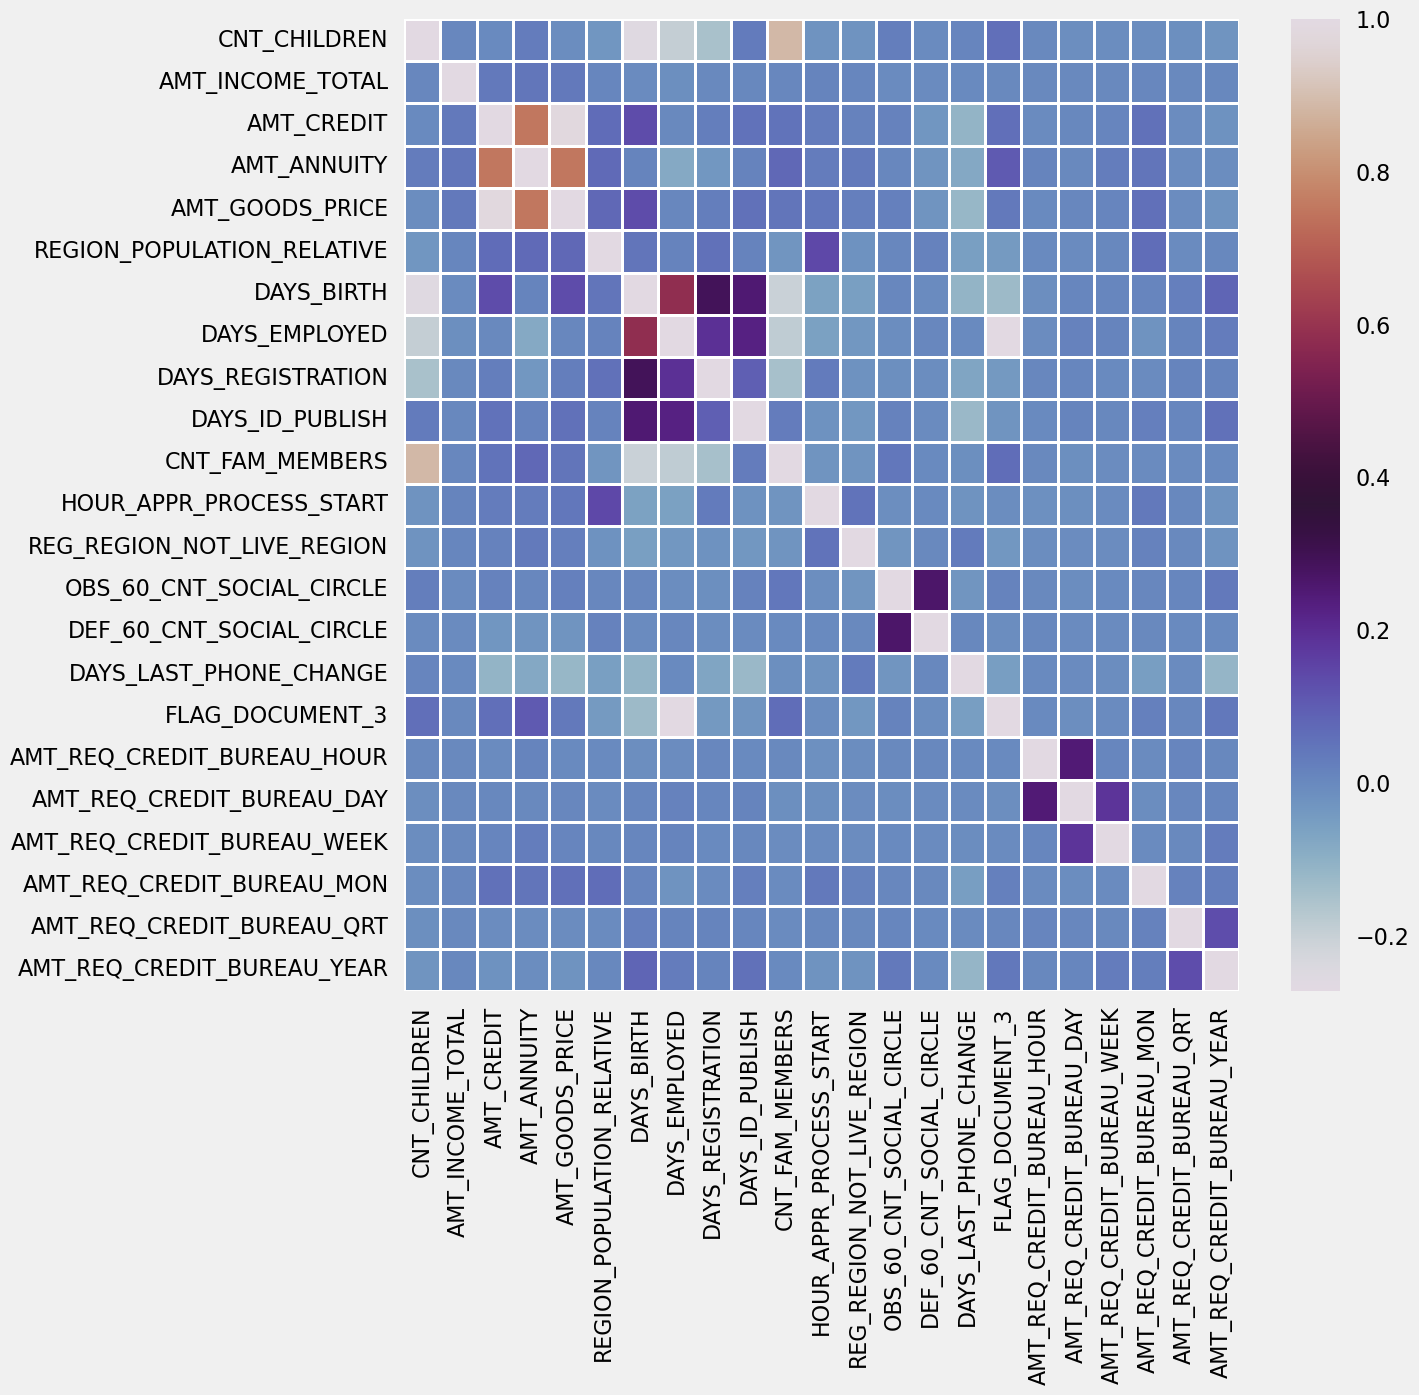

In [184]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="twilight",annot=False,linewidth =1)

#### Inferences:

    Credit amount is highly correlated with amount of goods price which is same as repayers.

    But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)

    We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).

    There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.

    Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.

    There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

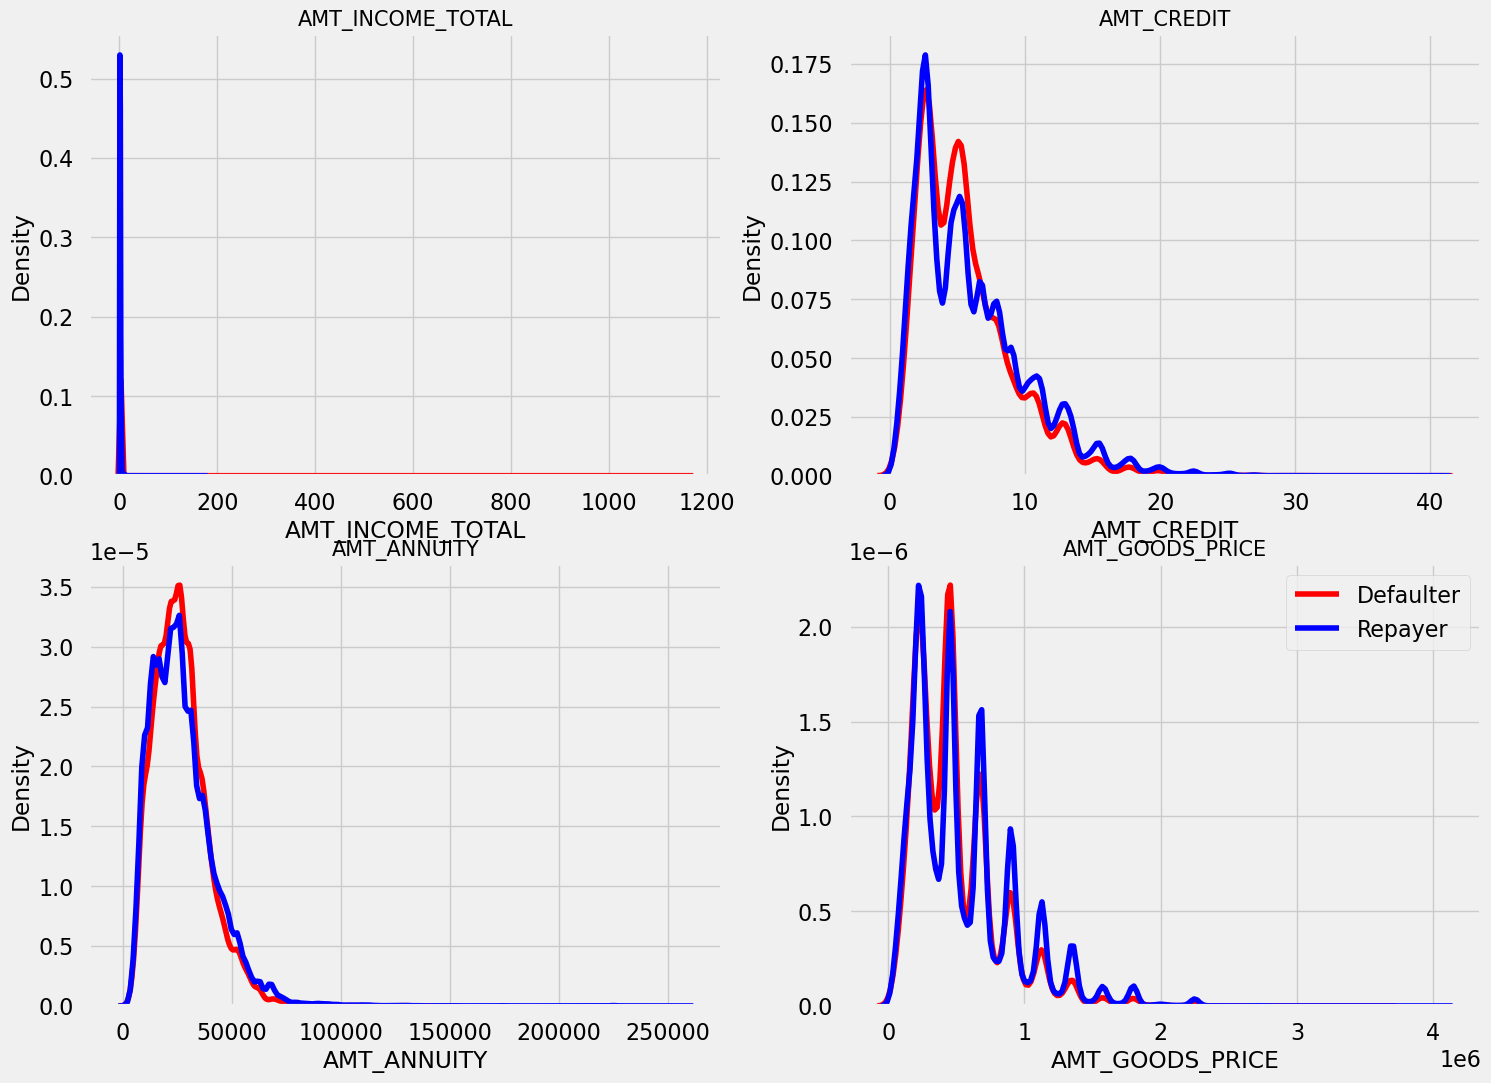

In [188]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='b', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Black'}) 
    
plt.legend()

plt.show() 


#### OBSERVATIONS:
    1.Most no of loans are given for goods price below 10 lakhs.

    2.Most people pay annuity below 50000 for the credit loan.

    3.Credit amount of the loan is mostly less then 10 lakhs.

    4.The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision.

<Figure size 1500x1000 with 0 Axes>

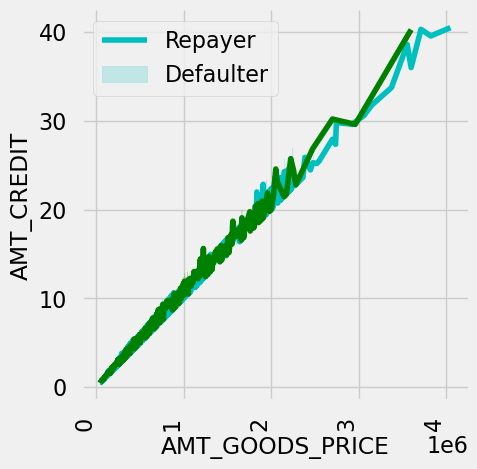

In [190]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',aDF,"TARGET", "line", ['r','c'], False,(15,10))

#### When the credit amount goes beyond 3M, there is an increase in defaulters.

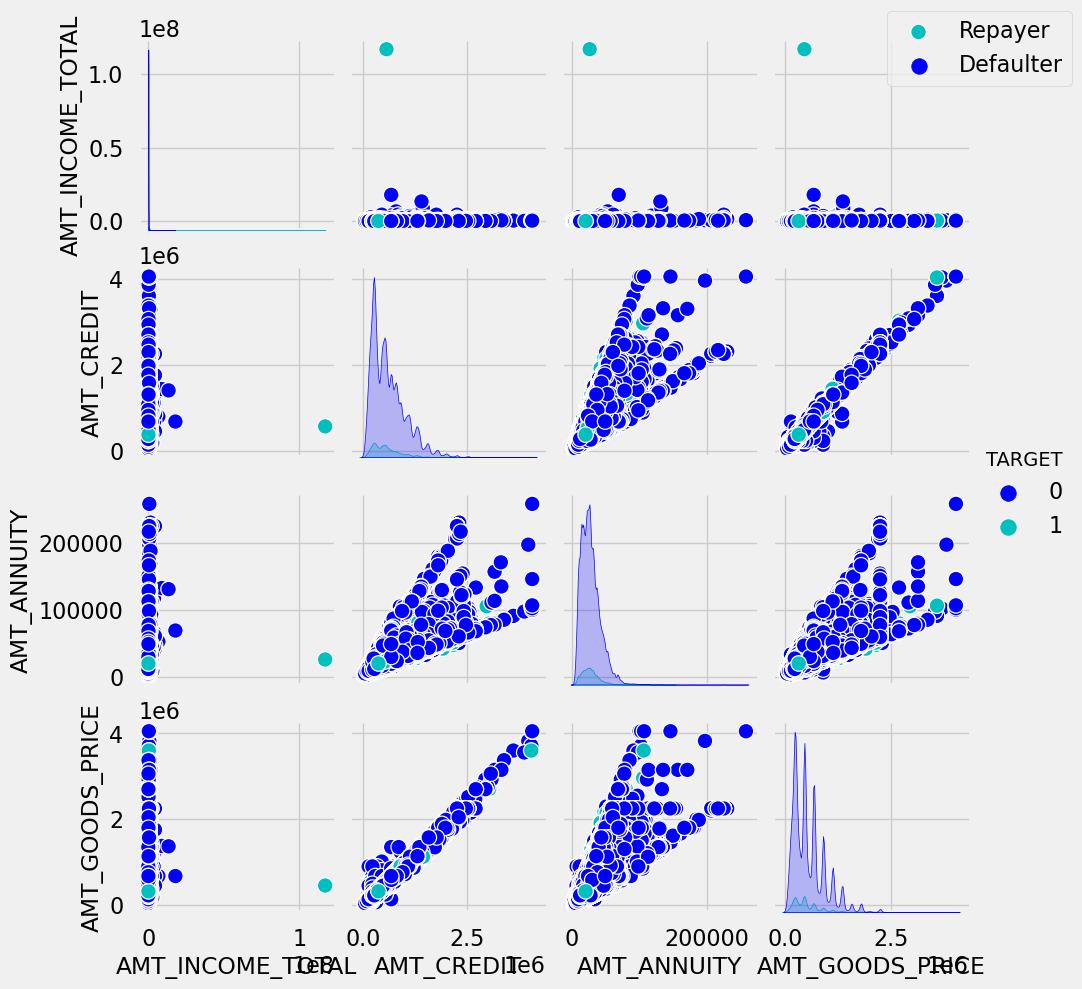

In [191]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["b","c"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

#### Infrences:
    1.When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters.

    2.AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line.

    3.There are very less defaulters for AMT_CREDIT >3M.

    4.Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section.

### Merged Dataframes Analysis

In [192]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(aDF, pDF, how='inner', on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             2.025      4.065975   
1               N             0             2.700     12.935025   
2               N             0             2.700     12.935025   
3               N             0             2.700     12.935025   
4               Y             0             0.675      1.350000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                    2   
1              291      Core staff              2.0                    1   
2              291      Core staff              2.0                    1   
3              291      Core staff              2.0                    1   
4             2531        Laborers              1.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           1                     MONDAY   
3                           1                     MONDAY   
4                           2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0  

In [193]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [194]:
# Checking the element count of the dataframe
loan_process_df.size

104613874

In [195]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1410175 non-null  category
 12  NAME_INCOME_TYPE            

In [196]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+00   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+00   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+00   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+00   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+00   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+03   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.412493e+06   
mean   5.875537e+00   2.701702e+04       5.277186e+05   
std    3.849173e+00   1.395116e+04       3.532465e+05   
min    4.500000e-01   1.615500e+03       4.050000e+04   
25%    2.700000e+00   1.682100e+04       2.385000e+05   
50%    5.084955e+00   2.492550e+04       4.500000e+05   
75%    8.079840e+00   3.454200e+04       6.795000e+05   
max    4.050000e+01   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.413701e+06  1.413701e+06   1.413701e+06   
mean                 2.074985e-02  1.632105e+04   7.266347e+04   
std                  1.334702e-02  4.344557e+03   1.433374e+05   
min                  2.900000e-04  7.489000e+03   0.000000e+00   
25%                  1.003200e-02  1.273900e+04   1.042000e+03   
50%                  1.885000e-02  1.604400e+04   2.401000e+03   
75%                  2.866300e-02  1.998000e+04   6.313000e+03   
max                  7.250800e-02  2.520100e+04   3.652430e+05   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count       1.413701e+06     1.413701e+06     1.413701e+06   
mean        5.003233e+03     3.034563e+03     2.150501e+00   
std         3.551051e+03     1.507376e+03     9.006787e-01   
min         0.000000e+00     0.000000e+00     1.000000e+00   
25%         2.001000e+03     1.783000e+03     2.000000e+00   
50%         4.508000e+03     3.330000e+03     2.000000e+00   
75%         7.510000e+03     4.319000e+03     3.000000e+00   
max         2.467200e+04     7.197000e+03     2.000000e+01   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             1.413701e+06                1.413701e+06   
mean              1.198433e+01                1.207327e-02   
std               3.232181e+00                1.092132e-01   
min               0.000000e+00                0.000000e+00   
25%               1.000000e+01                0.000000e+00   
50%               1.200000e+01                0.000000e+00   
75%               1.400000e+01                0.000000e+00   
max               2.300000e+01                1.000000e+00   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.544176e+00              1.540436e-01   
std                2.530715e+00              4.658973e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.480000e+02              3.400000e+01   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.526303e+00              1.080426e-01   
std                2.508953e+00              3.790588e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.440000e+02              2.400000e+01   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CRED

In [197]:
# Bifurcating the aDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

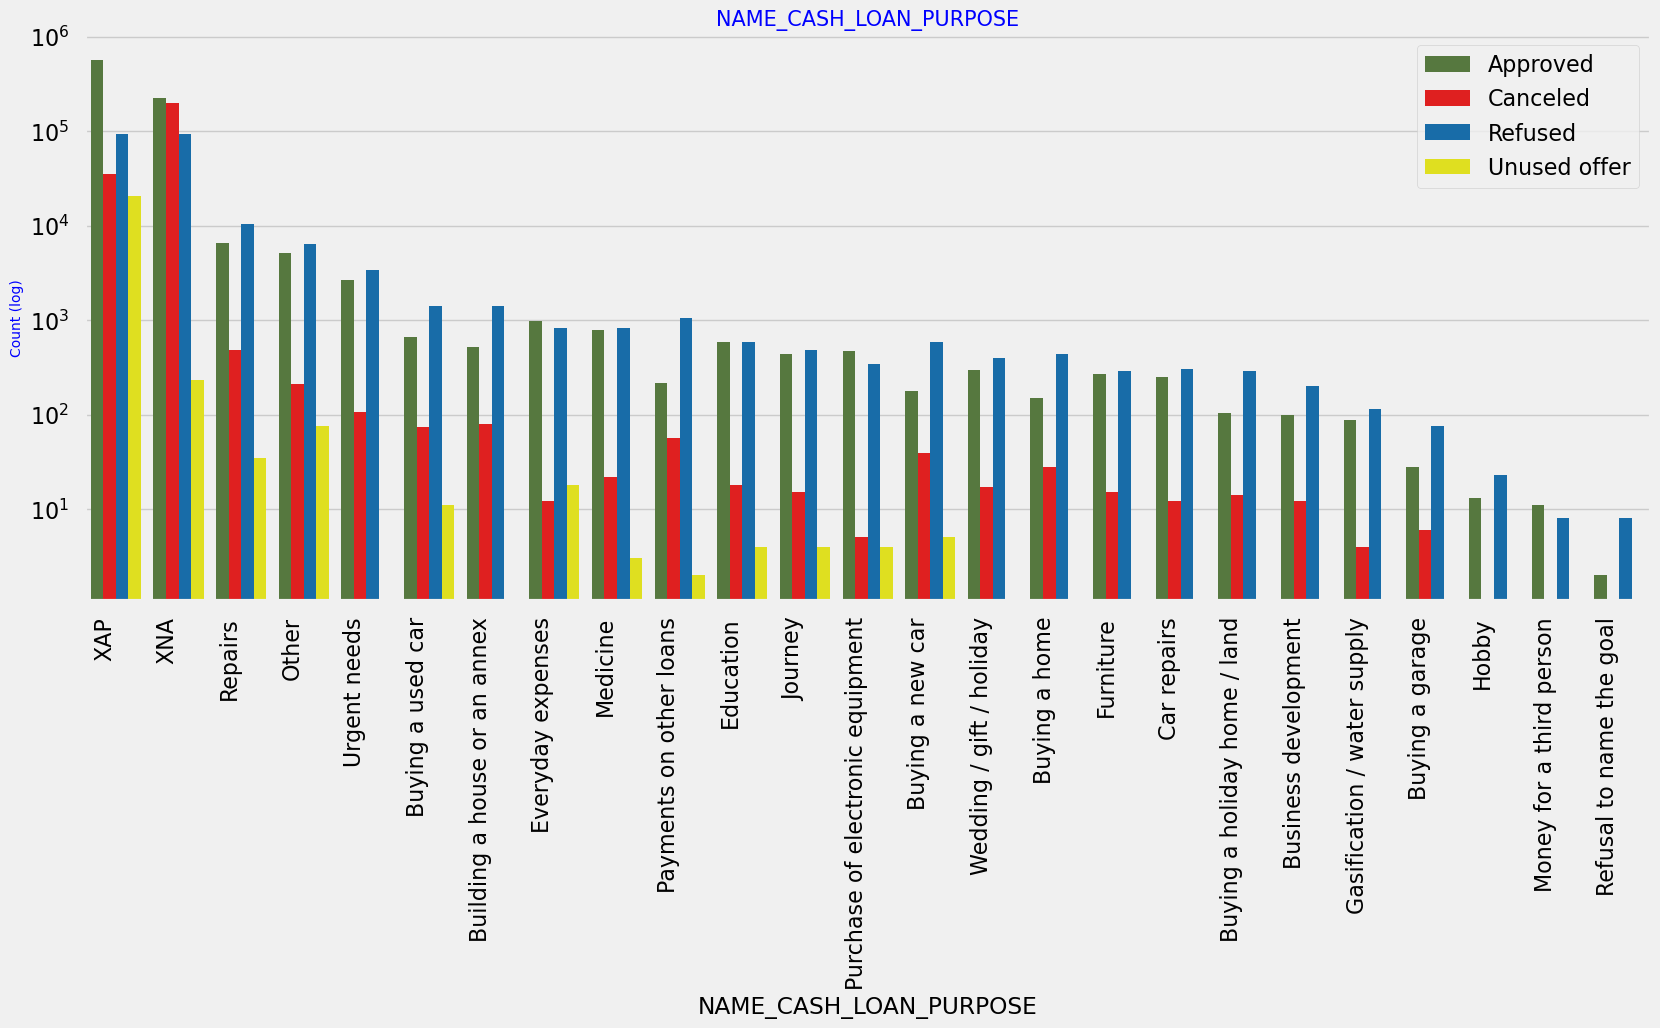

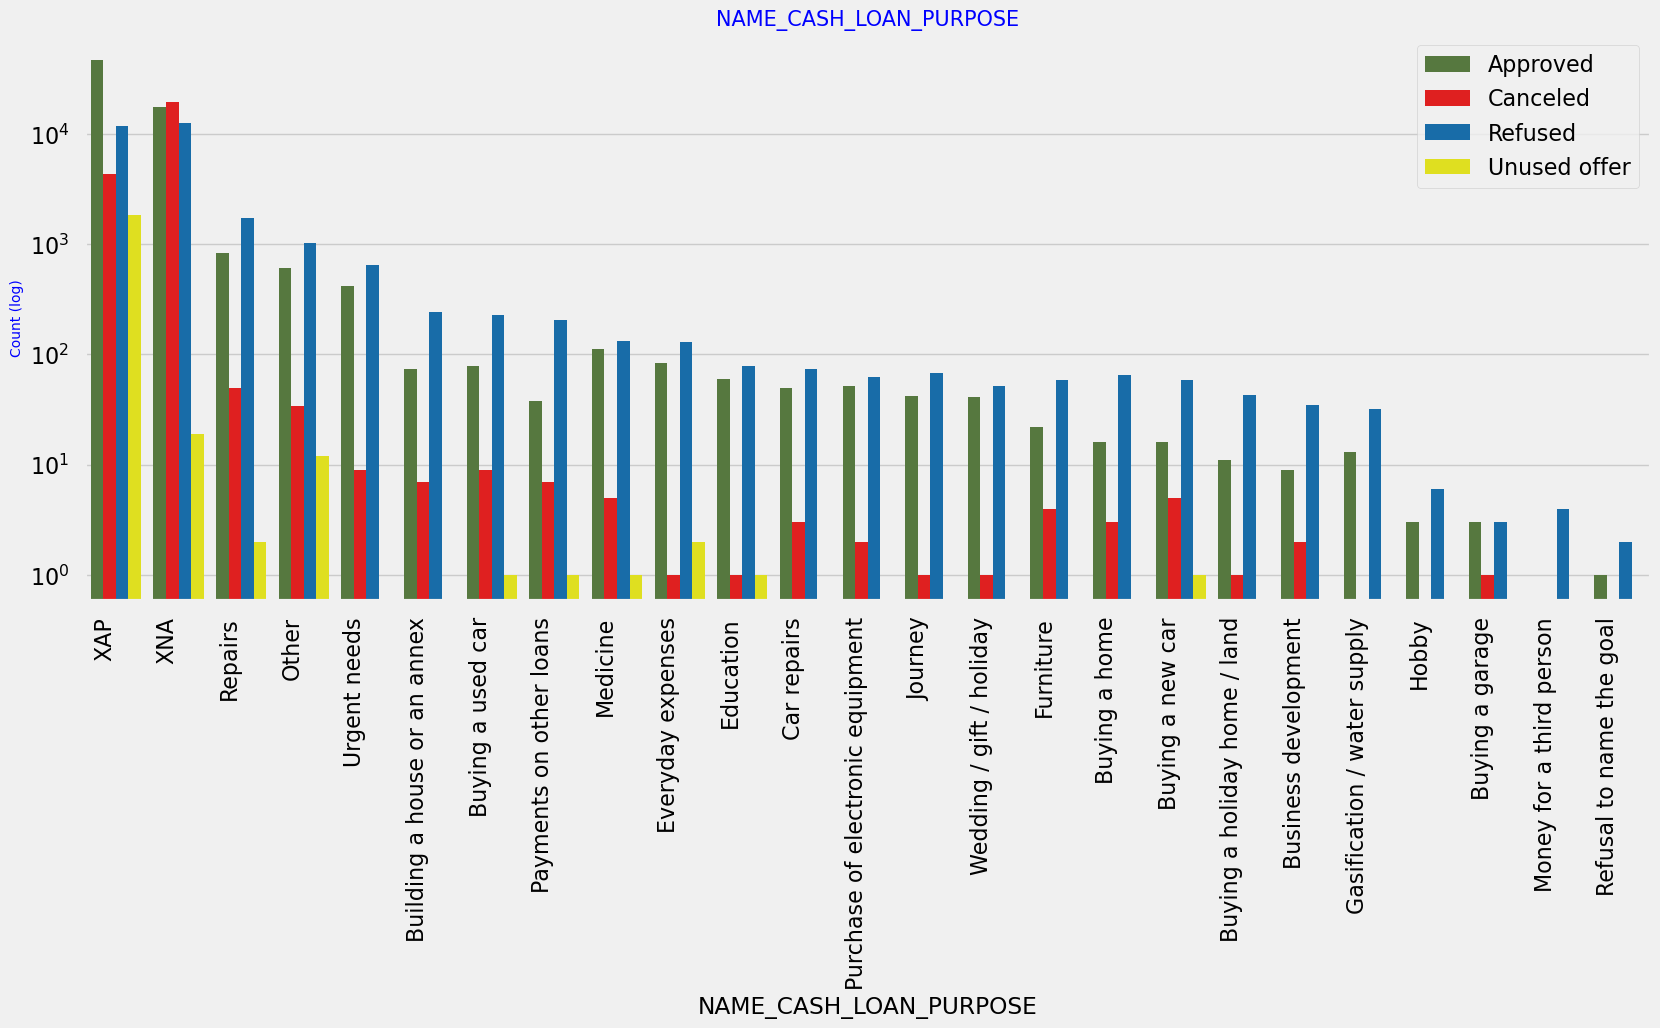

In [198]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

#### OBSERVATIONS:
    1.Loan purpose has high number of unknown values (XAP, XNA).

    2.Loan taken for the purpose of Repairs seems to have highest default rate.

    3.A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

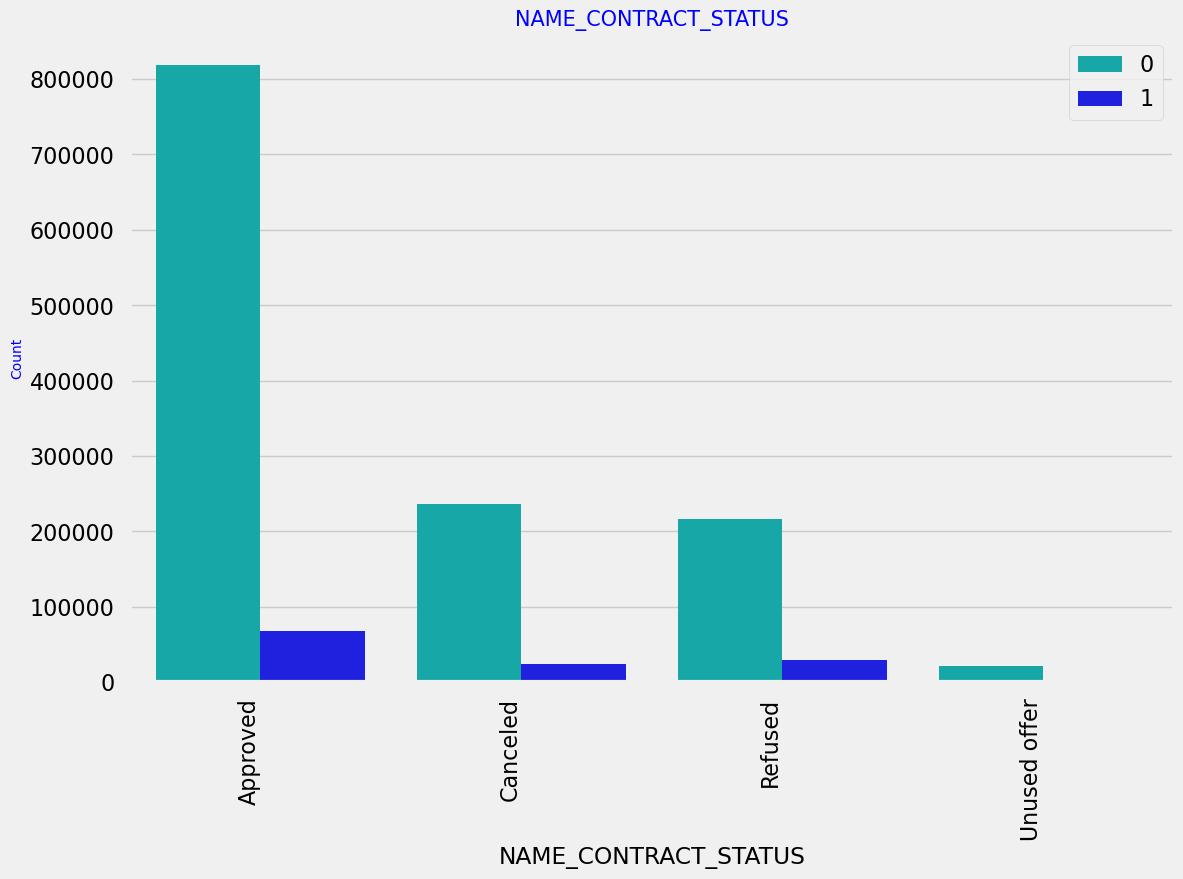

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [201]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['c','b'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)


#### OBSERVATIONS:
    1.90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients.

    2.88% of the clients who have been previously refused a loan has payed back the loan in current case.

    3.Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

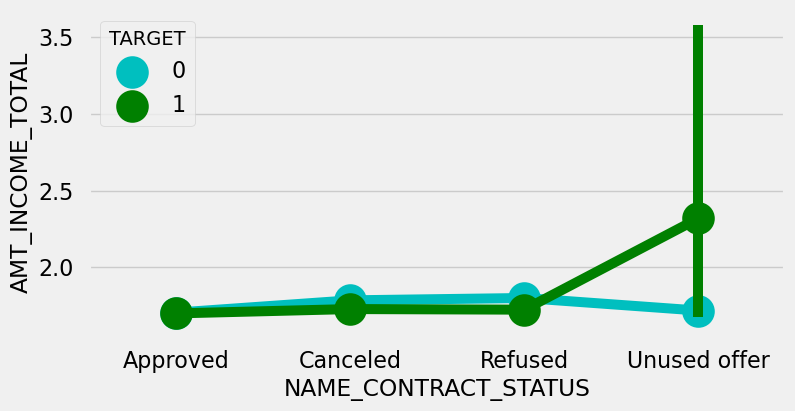

In [202]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

#### OBSERVATIONS:
The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others.

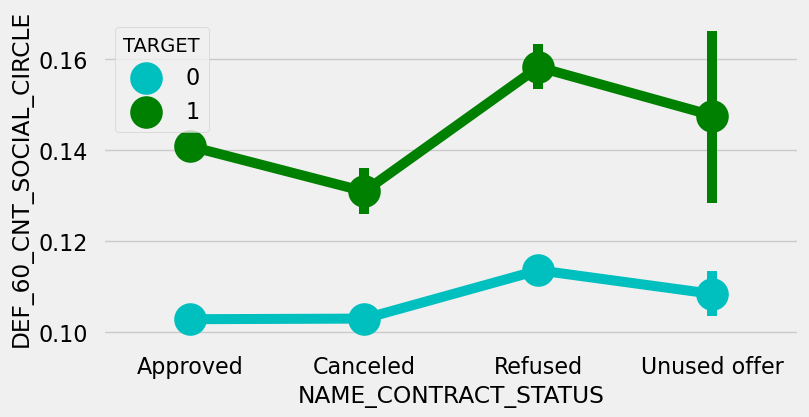

In [203]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

#### OBSERVATIONS:
Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

## CONCLUSION

#### TARGET

    .Banks should focus more on contract type ‘Student’ ,‘pensioner’ and ‘Businessman’ for successful payments.
    .Get as much as clients from housing type ‘With parents’or House\appartment or muncipal appartment as they are having least number of unsuccessful payments.

#### CONSIDER FOLLOWING

    .Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
    .Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
    .Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
    .Educational staus 'academic degree'having higher incometend to default the loans more.

## END